<h1 align="center">Trabajo práctico integrador. <br> Análisis de datos.</h1>
<h4 align="center">Universidad de Buenos Aires.</h4>
<p align="right"> Por: Sevann Radhak Triztan. </p>

# 1. Introducción y motivación.

### 1.1. Dataset elegido.

Datos de distintas estaciones meteorológicas de Australia (weatherAus).
* Preguntas interesantes para considerar aquí: El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos meteorológicos del día actual.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('./weatherAUS.csv')
PLOT = True

# **2.** Análisis exploratorio inicial.

In [3]:
data.shape

(145460, 23)

### **2.1.** Visualizar las primeras filas.

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### **2.2.** Realizar un resumen de 5 números.

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### **2.3.** Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Definición de Variables Categóricas.

In [7]:
def categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def print_categorical_columns(data):
    categorical = categorical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in categorical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Categorical columns:')
    for col, null_count in sorted_columns:      
        unique_values = list(data[col].unique())
        if len(unique_values) > 20:
            unique_values = unique_values[:20] + ['...'] 
        print(f'{col.ljust(15)} {null_count} {str('null values.').ljust(15)} \t {data[col].nunique()} unique values: \t {unique_values}')

In [8]:
print_categorical_columns(data)

Categorical columns:
WindDir9am      10566 null values.    	 16 unique values: 	 ['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N', 'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']
WindGustDir     10326 null values.    	 16 unique values: 	 ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']
WindDir3pm      4228 null values.    	 16 unique values: 	 ['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE']
RainTomorrow    3267 null values.    	 2 unique values: 	 ['No', 'Yes', nan]
RainToday       3261 null values.    	 2 unique values: 	 ['No', 'Yes', nan]
Date            0 null values.    	 3436 unique values: 	 ['01/12/2008', '02/12/2008', '03/12/2008', '04/12/2008', '05/12/2008', '06/12/2008', '07/12/2008', '08/12/2008', '09/12/2008', '10/12/2008', '11/12/2008', '12/12/2008', '13/12/2008', '14/12/2008', '15/12/2008', '16/12/2008', '17/12/2008', '18/12/2008', '19/12/2008', '20

- **WindDir9am, WindGustDir, WindDir3pm:**  
Variables categóricas nominales que representan la dirección del viento en diferentes momentos del día.  
- **RainTomorrow, RainToday:**  
Variables categóricas binarias que indican si llovió hoy o si lloverá mañana. Son muy informativas para el presente problema de clasificación.  
- **Date, Location:**  
Variables categóricas nominales que representan, respectivamente, la fecha y la ubicación de la observación. Son las unicas variables que contienen la totalidad de la información, por lo que serán fundamentales para el análisis e interpretación de los datos.


#### Definición de Variables Numéricas:

In [9]:
def numerical_columns(df):
    return df.select_dtypes(include=['float64', 'int32', 'int64']).columns

def print_numerical_columns(data):
    numerical = numerical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in numerical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Numerical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values.')

In [10]:
print_numerical_columns(data)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


- **Sunshine, Evaporation:**   
Variables numéricas continuas que representan diferentes aspectos del clima.
- **Cloud3pm, Cloud9am:**  
Variables numéricas discretas que representan la fraccion de cielo cubierto por nubes (en octavos) en diferentes momentos del día.  
- **Pressure9am, Pressure3pm:**  
Variables numéricas continuas que representan la presión atmosférica en diferentes momentos del día.
- **WindGustSpeed, WindSpeed3pm, WindSpeed9am:**  
Variables numéricas continuas que representan la velocidad del viento en diferentes momentos del día
- **Humidity3pm, Humidity9am:**  
Variables numéricas continuas que representan la humedad (en porcentaje %) para  diferentes momentos del día.
- **Temp3pm, Temp9am, MinTemp, MaxTemp:**  
Variables numéricas continuas que representan la temperatura en diferentes momentos del día y las temperaturas mínima y máxima. **MinTemp y MaxTemp** son variables significativamente representativas que, al poseer menor cantidad de valores faltantes, son un excelente punto de partida para nuestro análisis e imputación de los datos faltantes.
- **Rainfall:**  
Variable numérica continua que representa la cantidad de lluvia. Es muy informativa para entender e interpretar el comportamiento de otras variables en nuestro análisis.

### **2.4.** Identificar las variables de entrada y de salida del problema.

In [11]:
def input_and_target_variables(data, target):
    input_variables = data.drop(target, axis=1)
    target_variable = data[target]
    variable_names = input_variables.columns.tolist()
    return variable_names, target_variable

In [12]:
variable_names, target_variable = input_and_target_variables(data, 'RainTomorrow')

print(f"Input variables: {variable_names}")
print(f'Target variable: {target_variable.name}')

Input variables: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Target variable: RainTomorrow


### **2.5.** Variables de entrada:
Realizar los siguientes análisis por tipo de variable.

In [13]:
import scipy.stats as stats

def plot_histogram(df, column, ax):
    plot = sns.histplot(df[column], bins=40, ax=ax, kde=True, color='blue') 
    plot.get_lines()[0].set_color('red')  
    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)

def print_statistics(df, column, ax=None):
    stats_text = f"""
    Mean: {df[column].mean():.2f}
    Median: {df[column].median():.2f}
    Mode: {df[column].mode()[0]:.2f}
    Std Dev: {df[column].std():.2f}
    Variance: {df[column].var():.2f}
    Skewness: {df[column].skew():.2f}
    Kurtosis: {df[column].kurt():.2f}
    """
    if ax is not None:
        ax.axis('off')
        ax.text(0.2, 0.5, stats_text, horizontalalignment='left', verticalalignment='center', fontsize=20)
    else:
        print(stats_text)

def draw_plots(df, column, axs):
    # Boxplot
    axs[1, 0].boxplot(df[column].dropna())
    axs[1, 0].set_title(f'Boxplot of {column}')

    # QQ-Plot
    stats.probplot(df[column].dropna(), dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title(f'QQ-Plot of {column}')

def plot_histogram_and_statistics(df, columns, PLOT=False):
    for column in columns:
        print(f'Column: {column}')
        if PLOT:
            fig, axs = plt.subplots(2, 2, figsize=(15, 10))
            plot_histogram(df, column, axs[0, 0])
            print_statistics(df, column, axs[0, 1])
            draw_plots(df, column, axs)
            plt.tight_layout()
            plt.show()
        else:
            print_statistics(df, column)

#### **2.5.1. Numéricas:** Obtener conclusiones acerca de la distribución de los datos.

Column: MinTemp


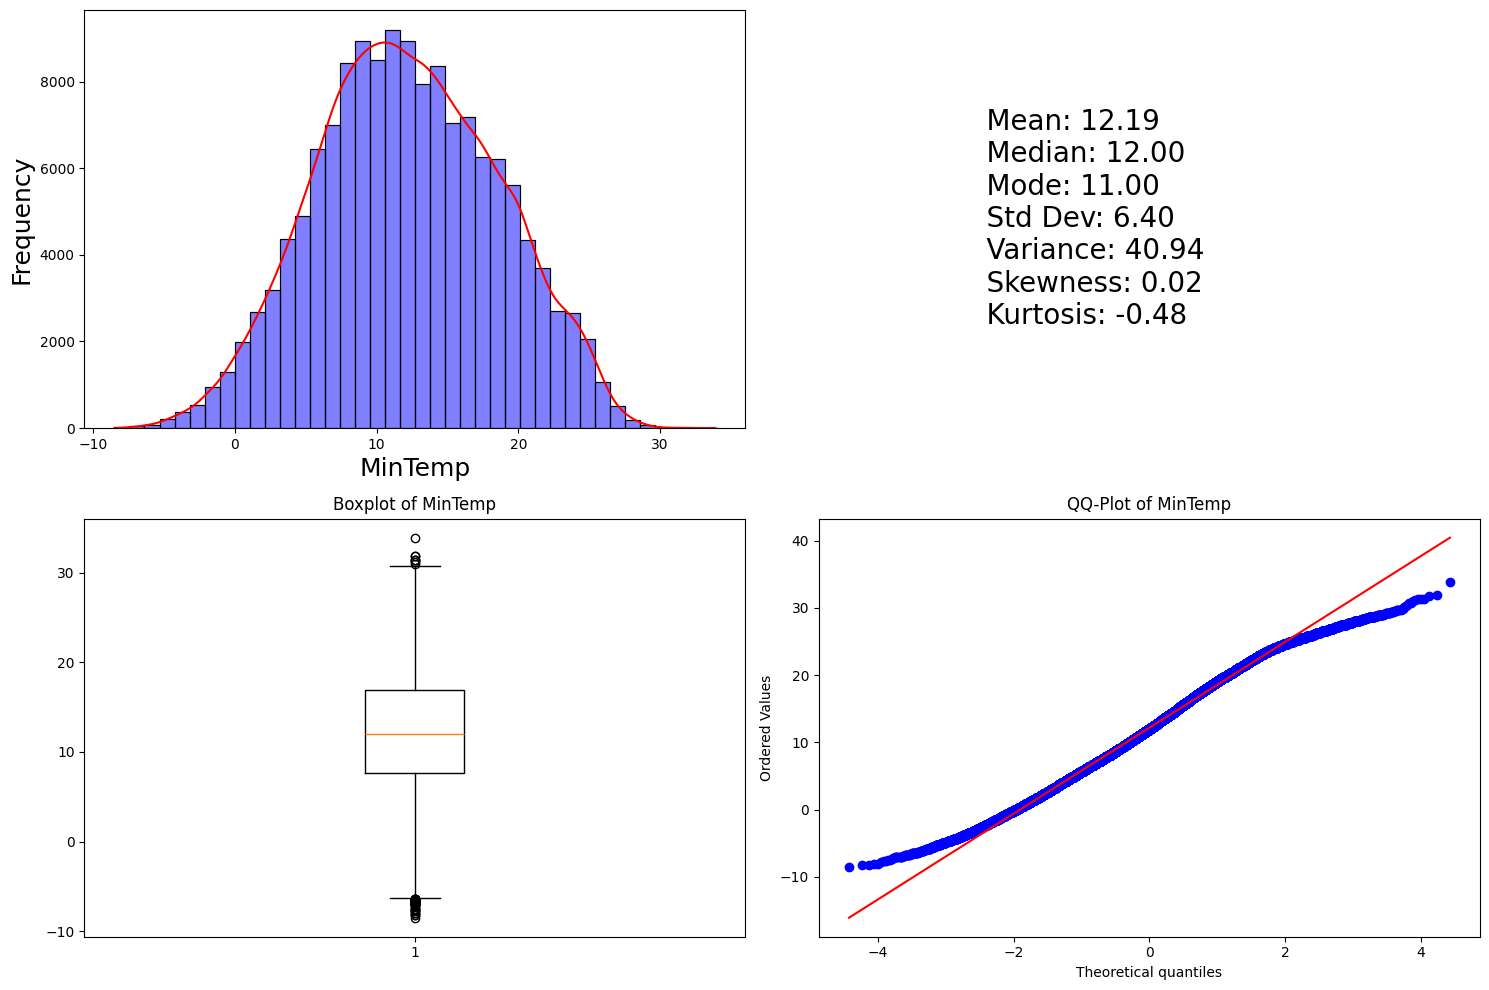

Column: MaxTemp


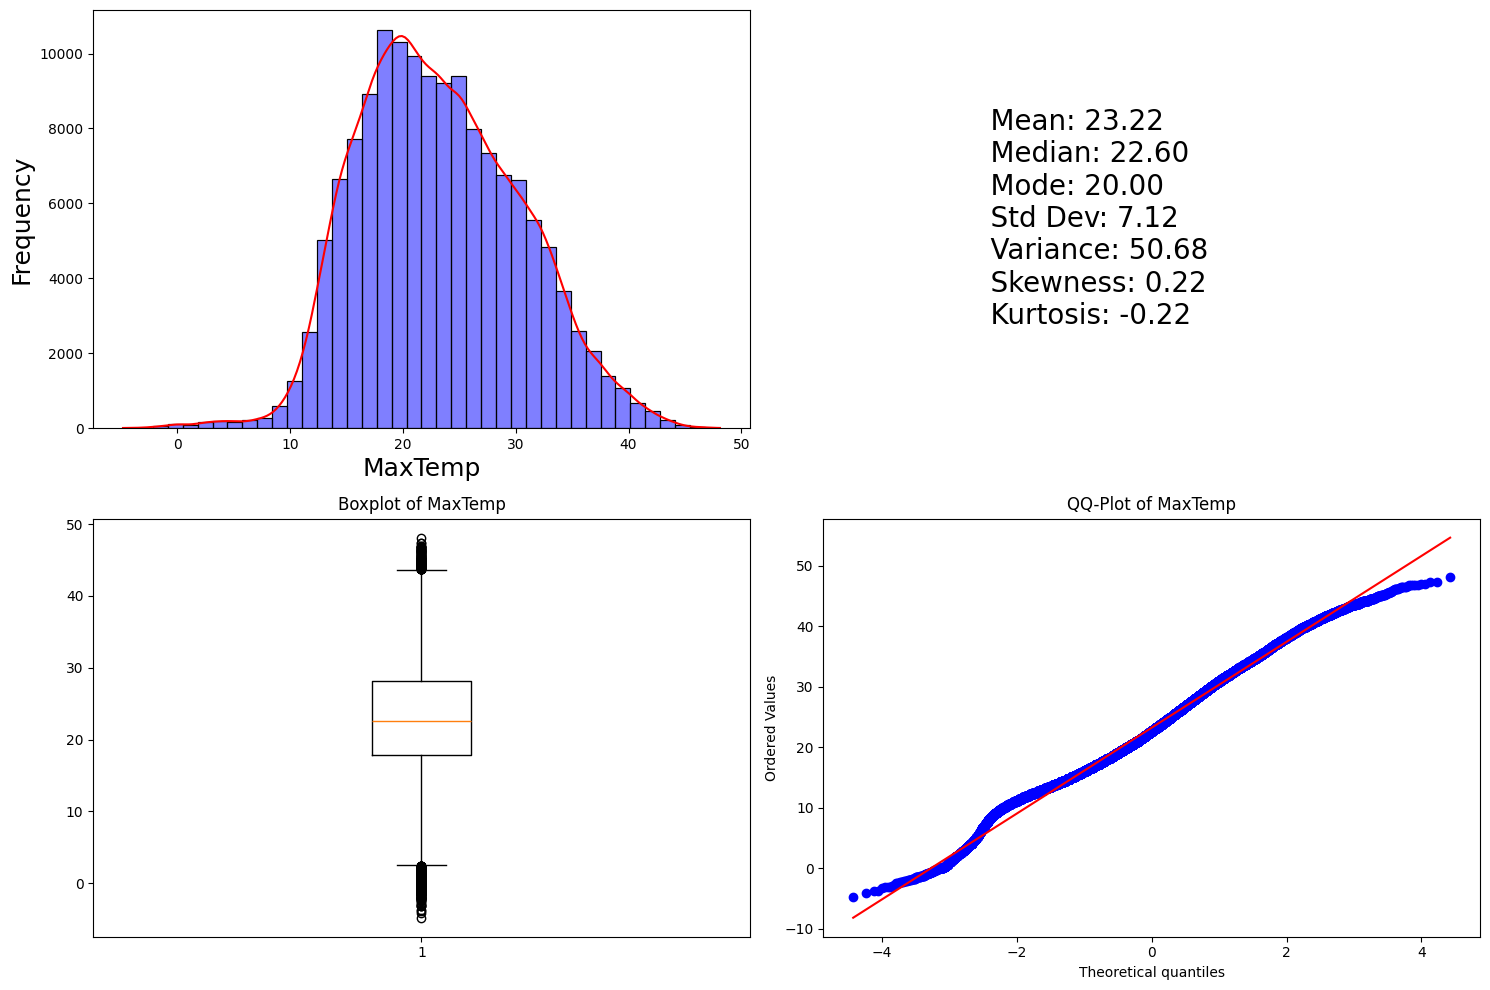

Column: Rainfall


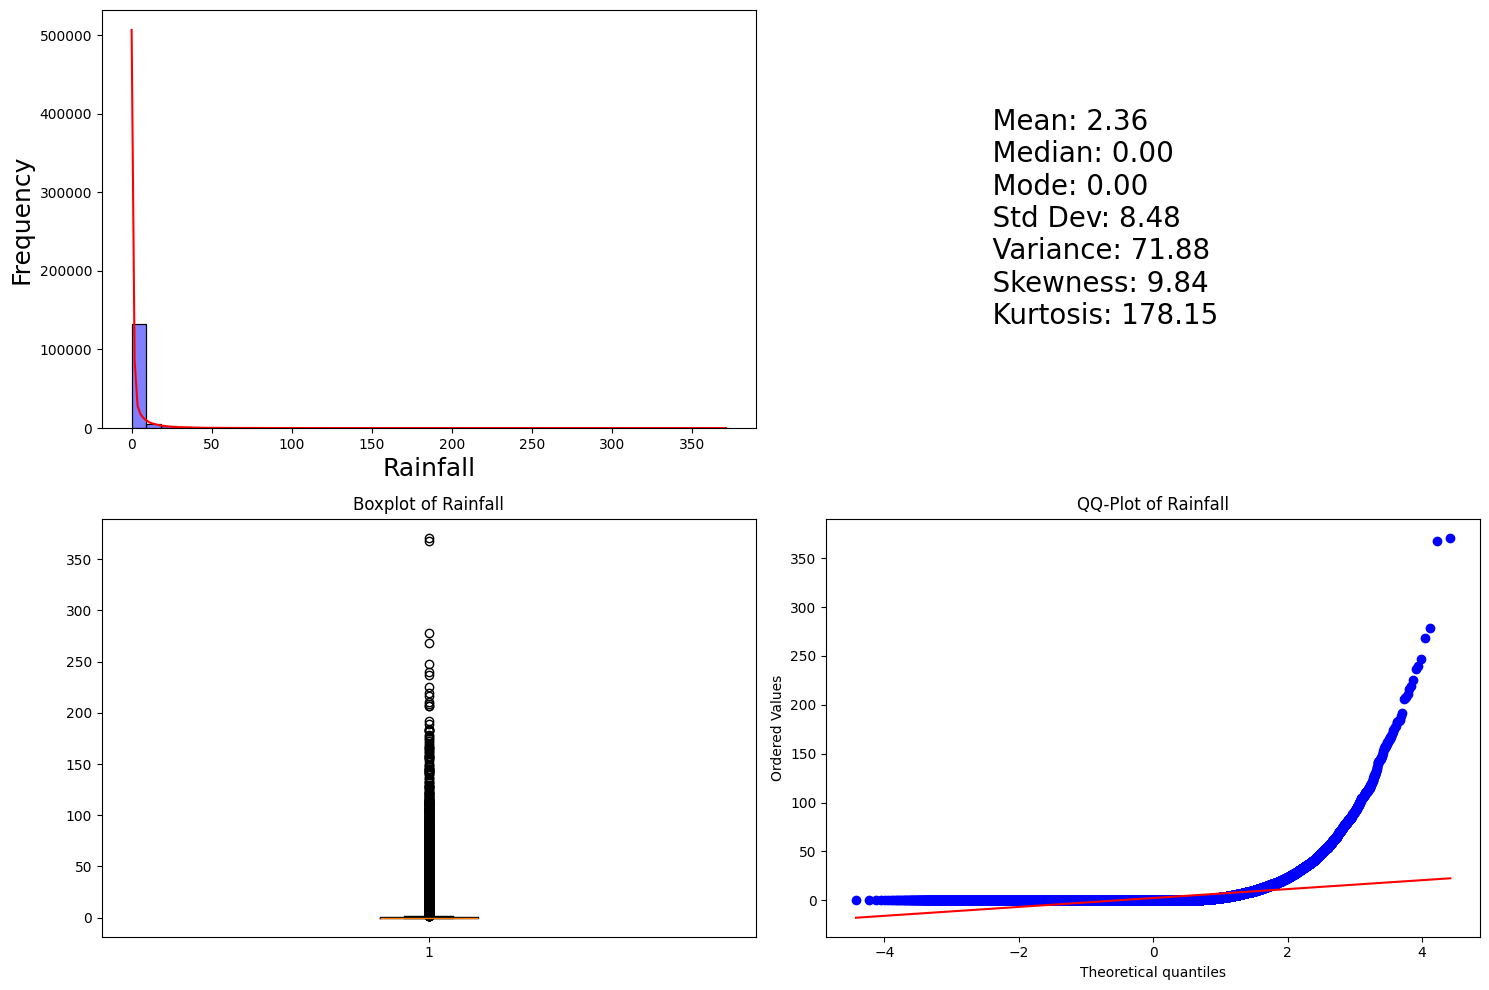

Column: Evaporation


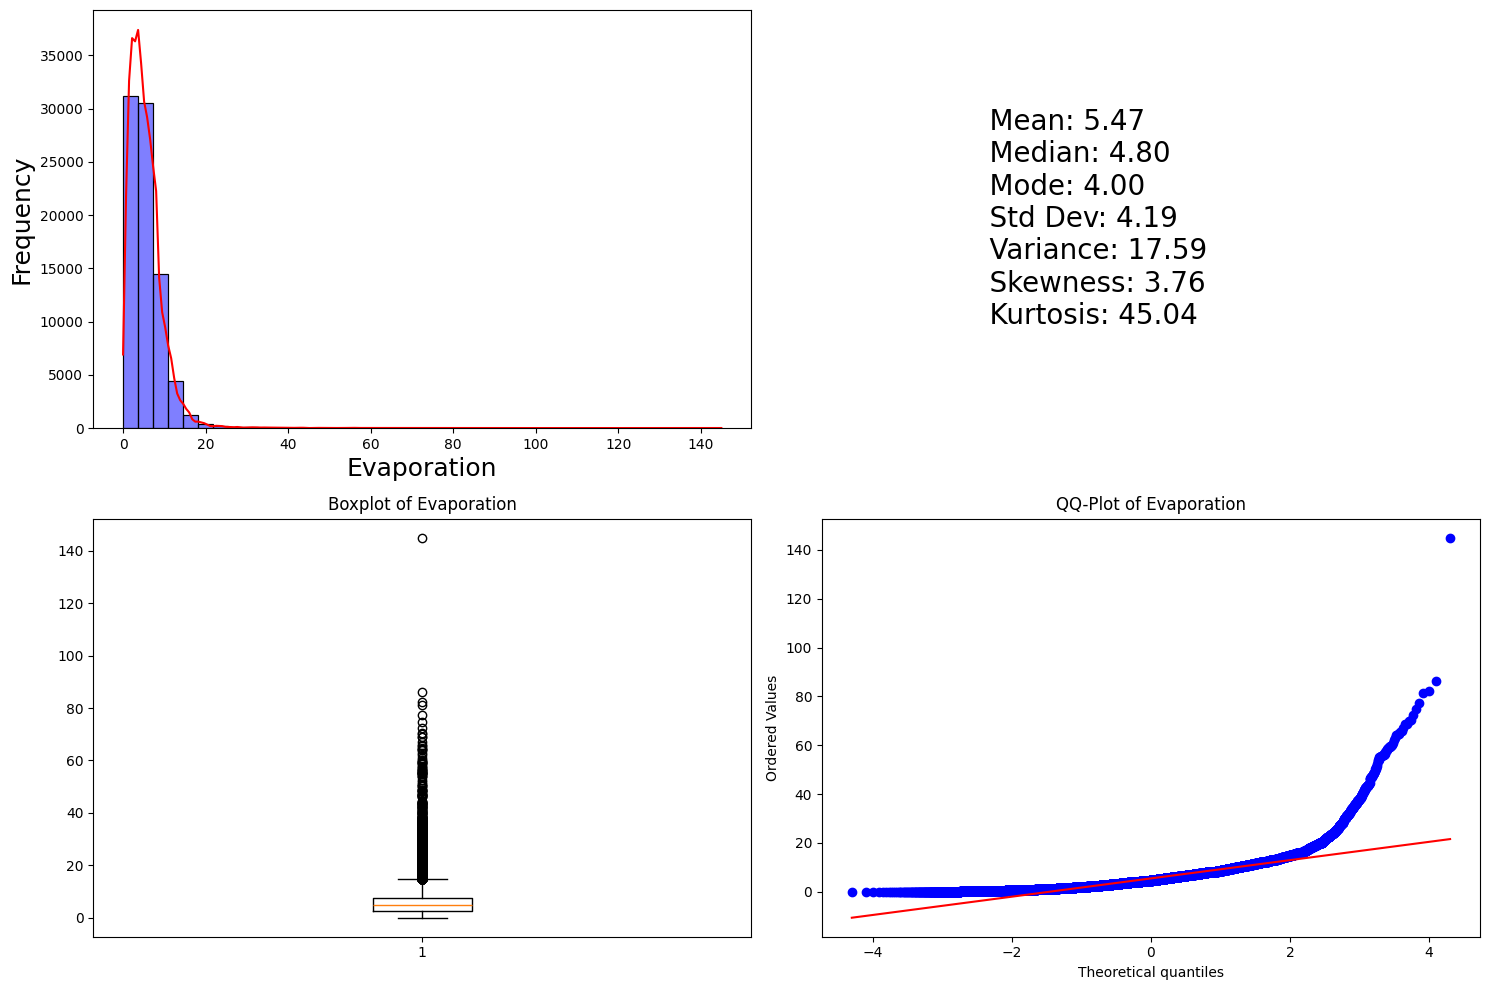

Column: Sunshine


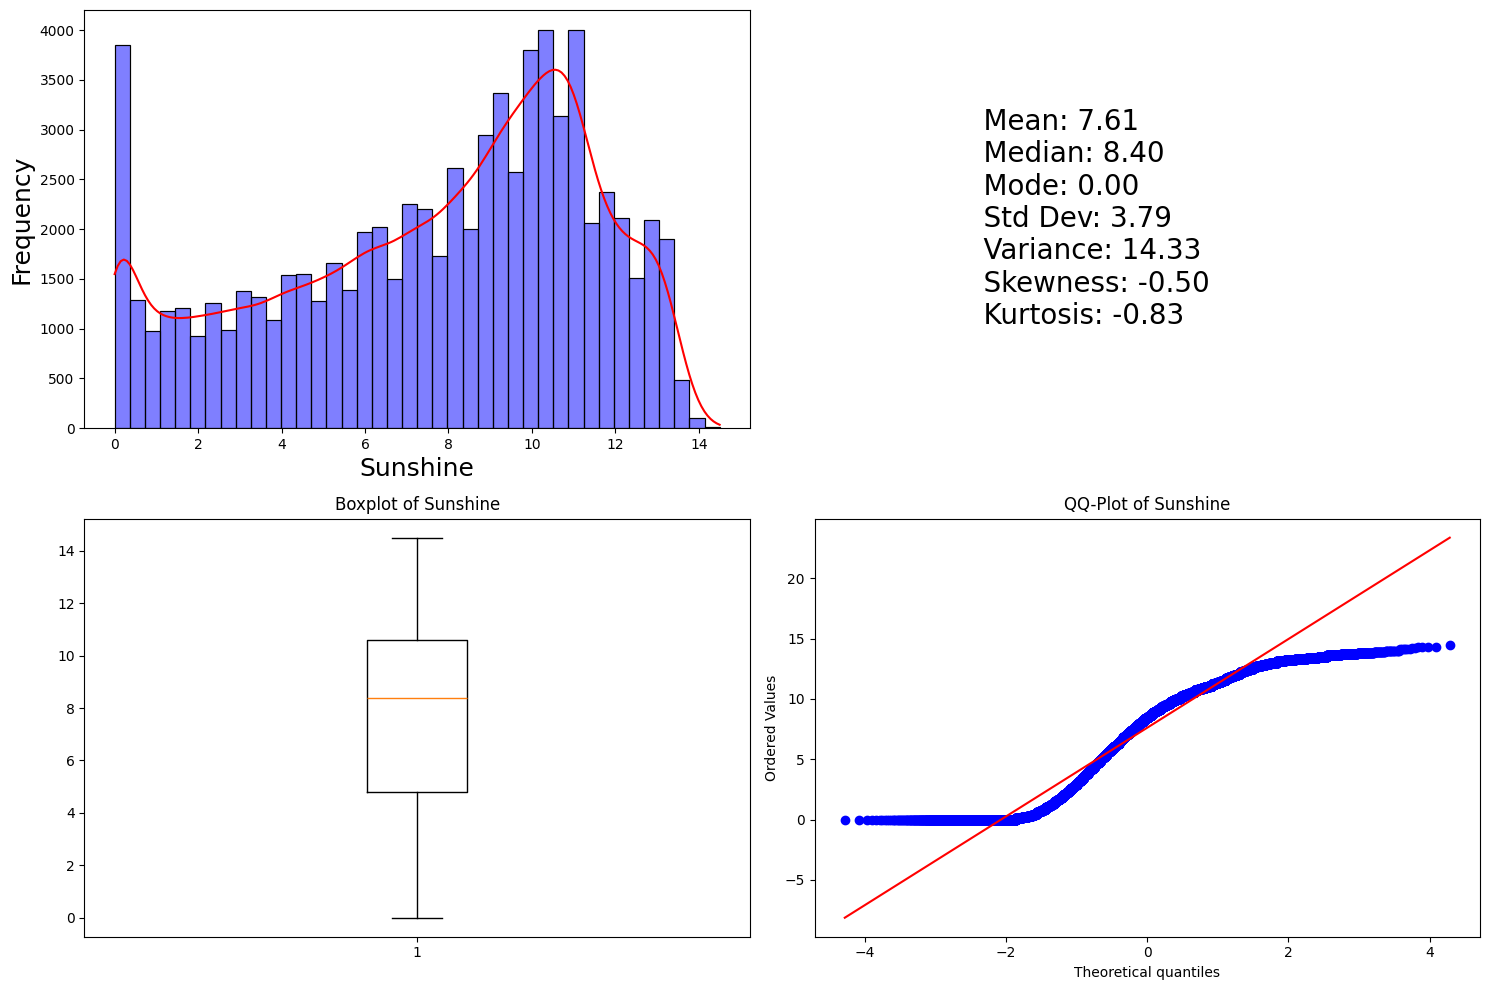

Column: WindGustSpeed


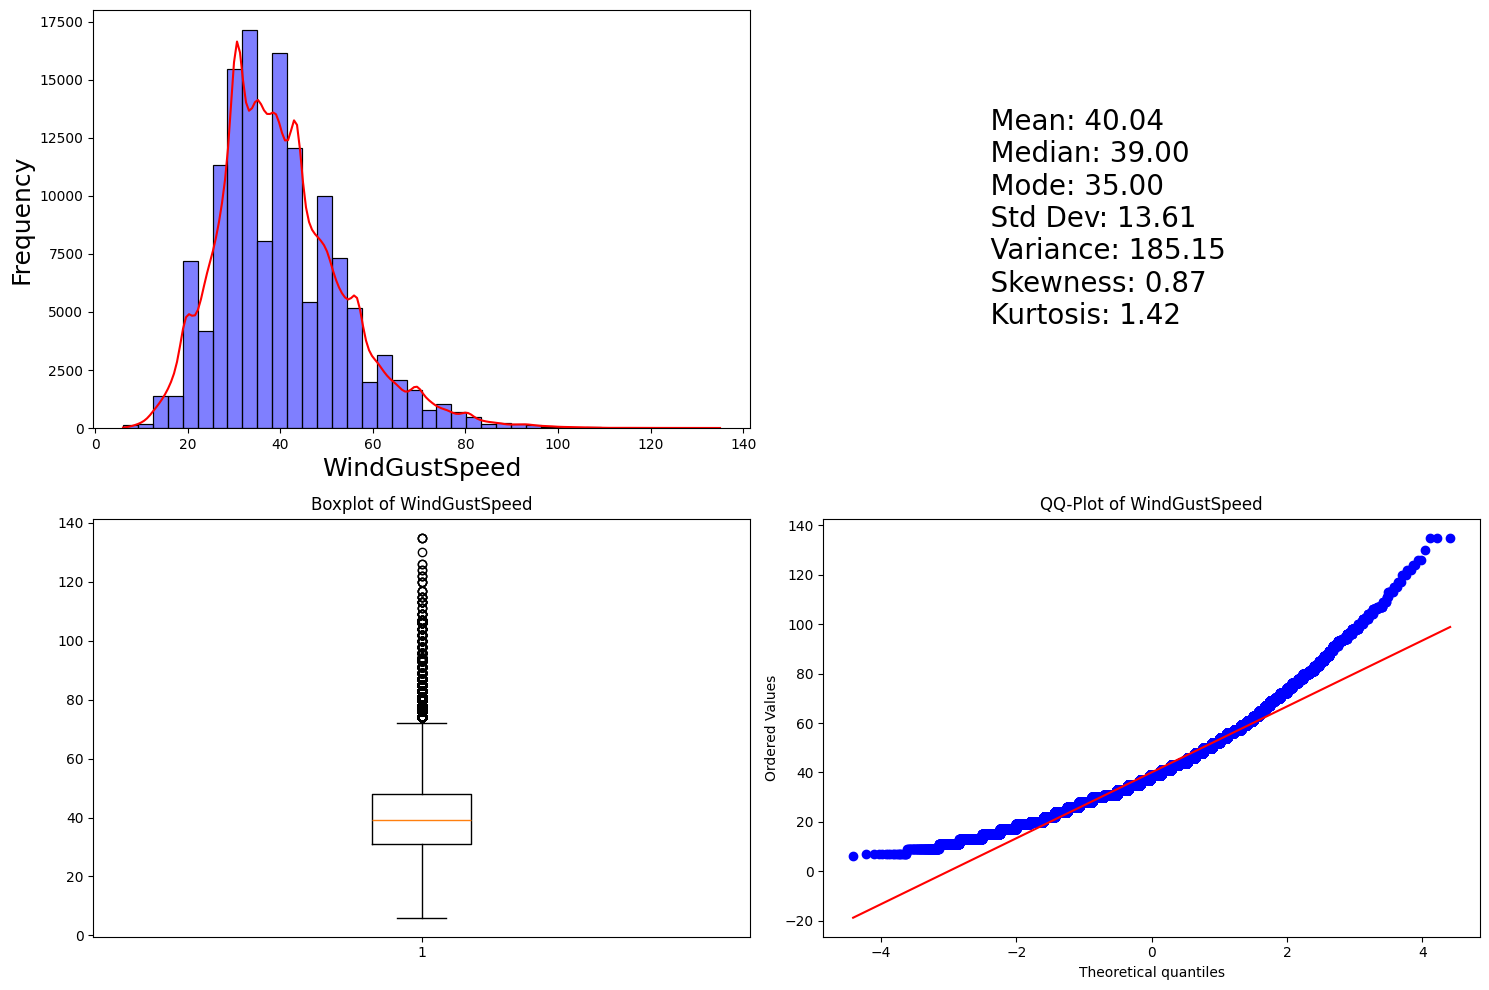

Column: WindSpeed9am


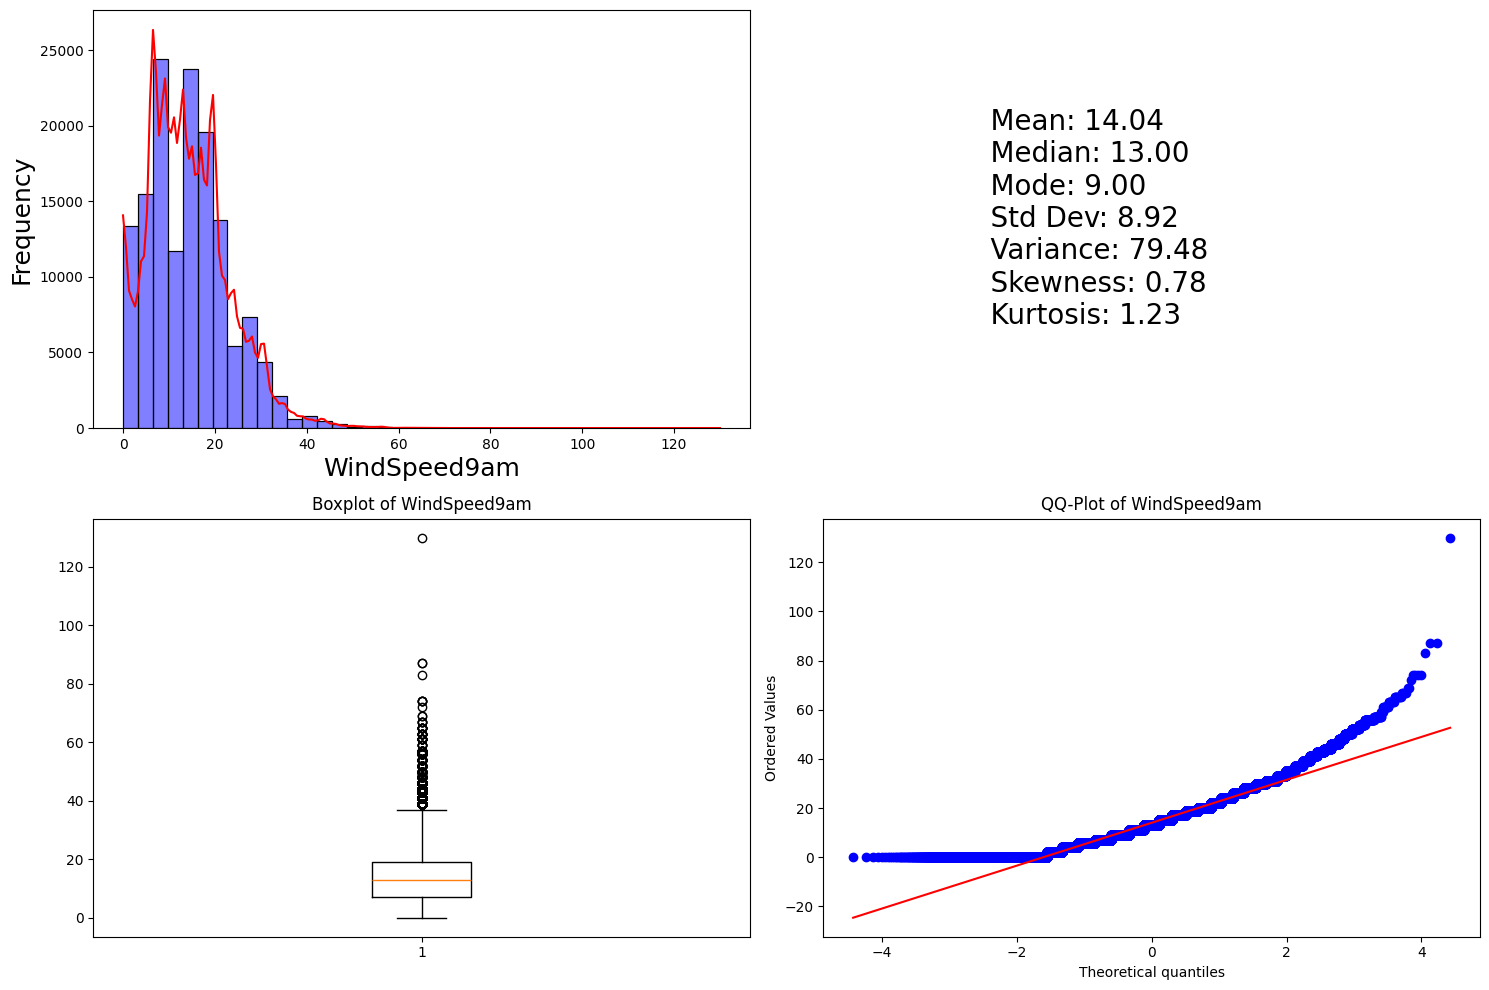

Column: WindSpeed3pm


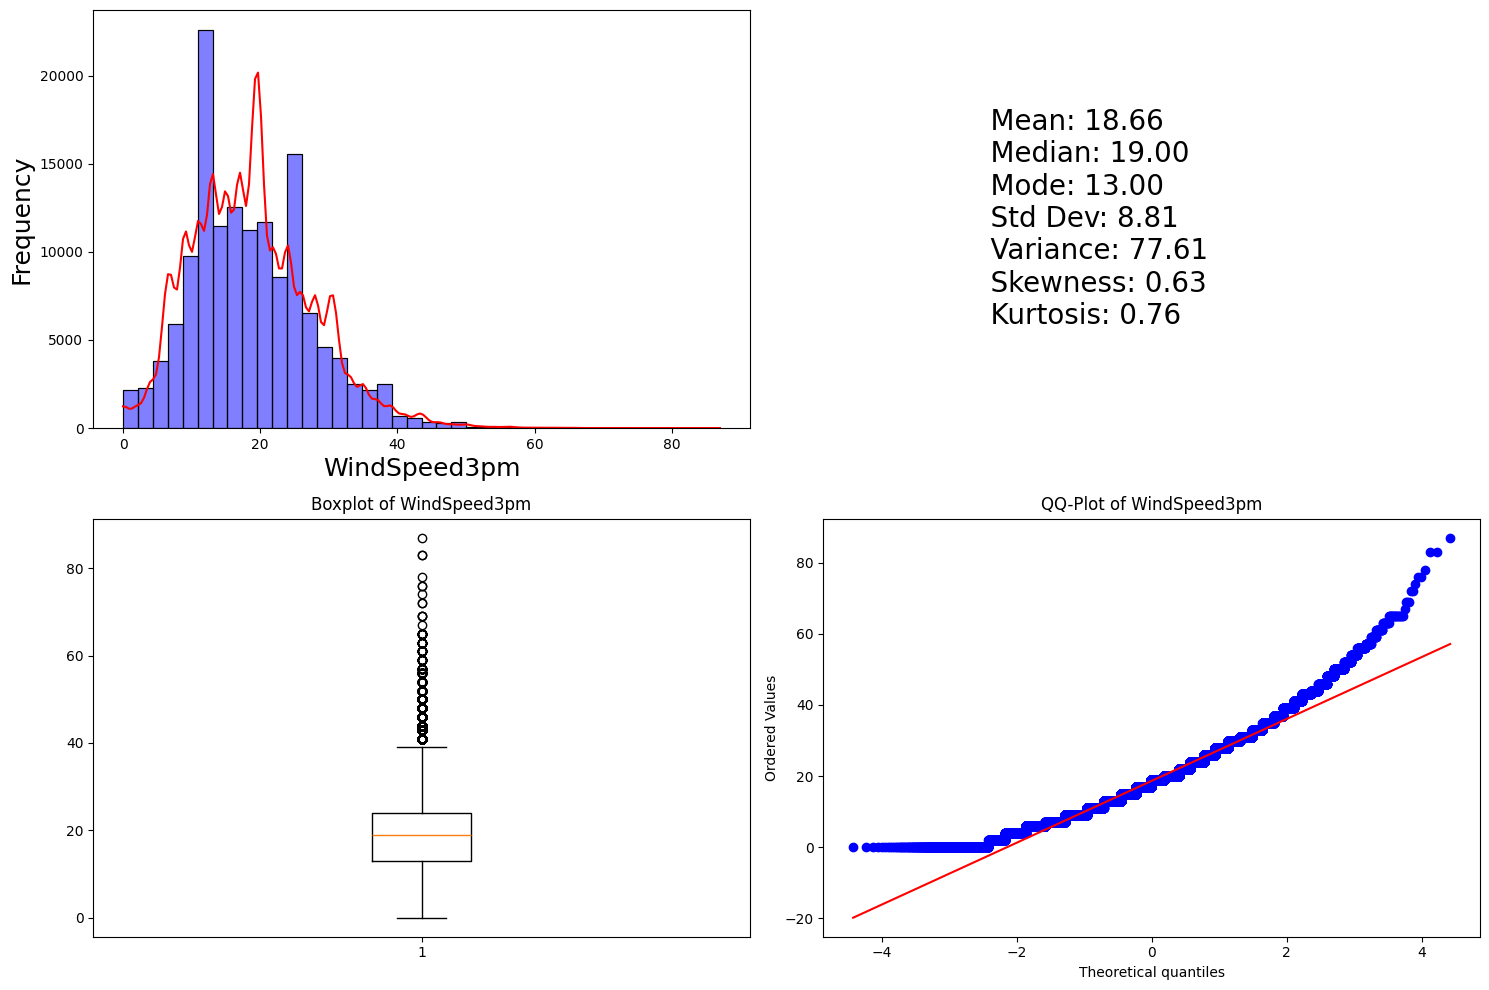

Column: Humidity9am


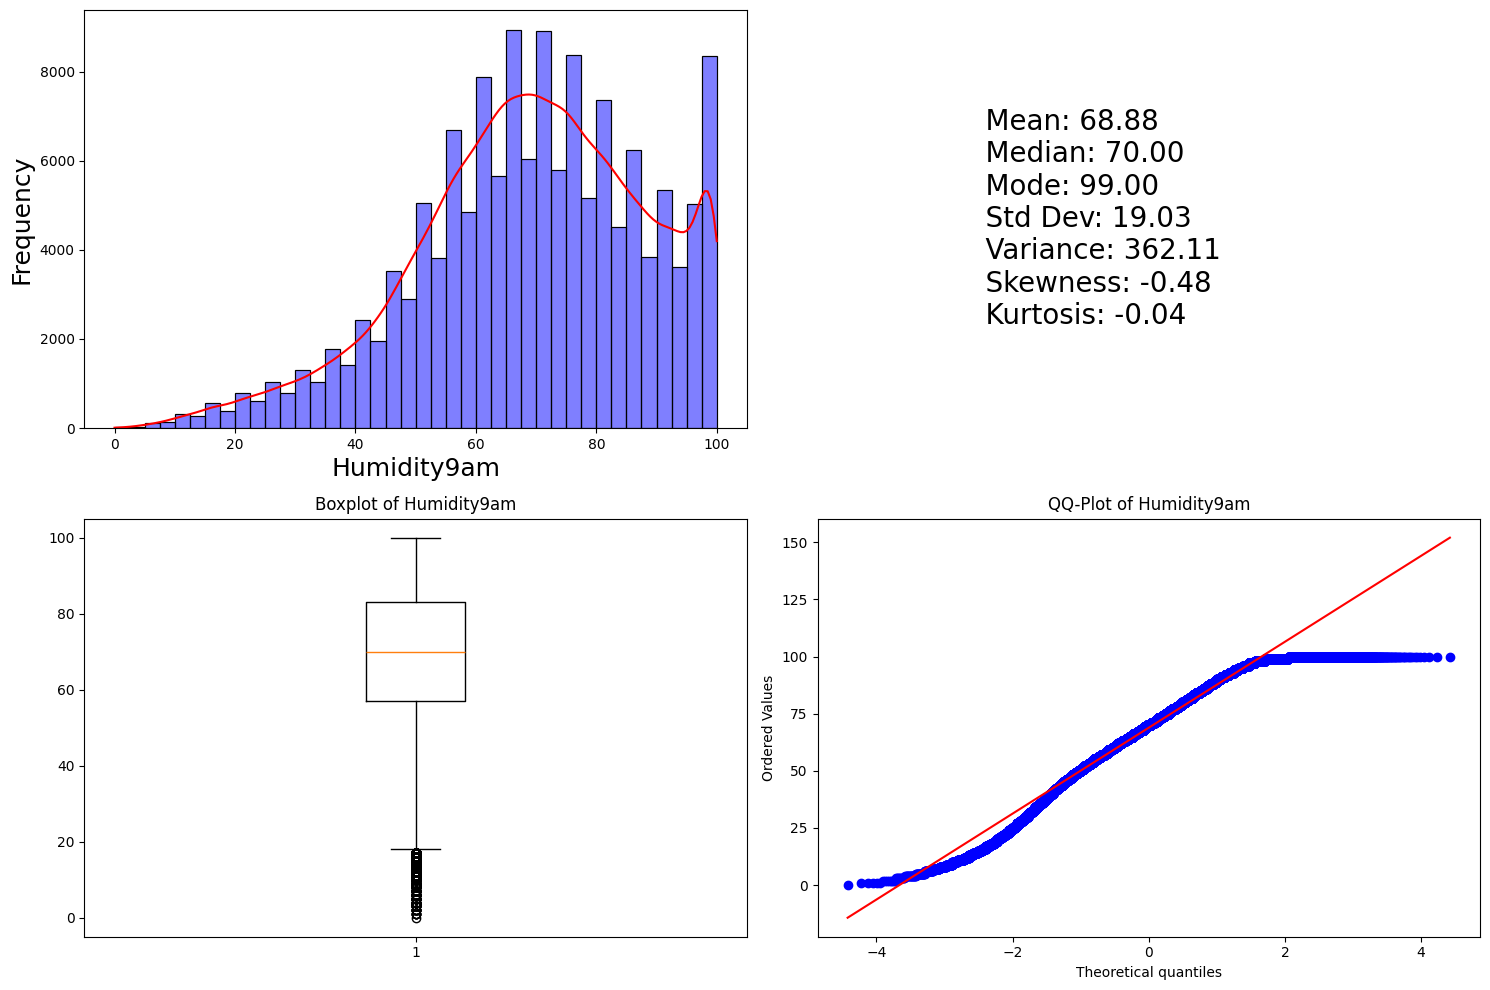

Column: Humidity3pm


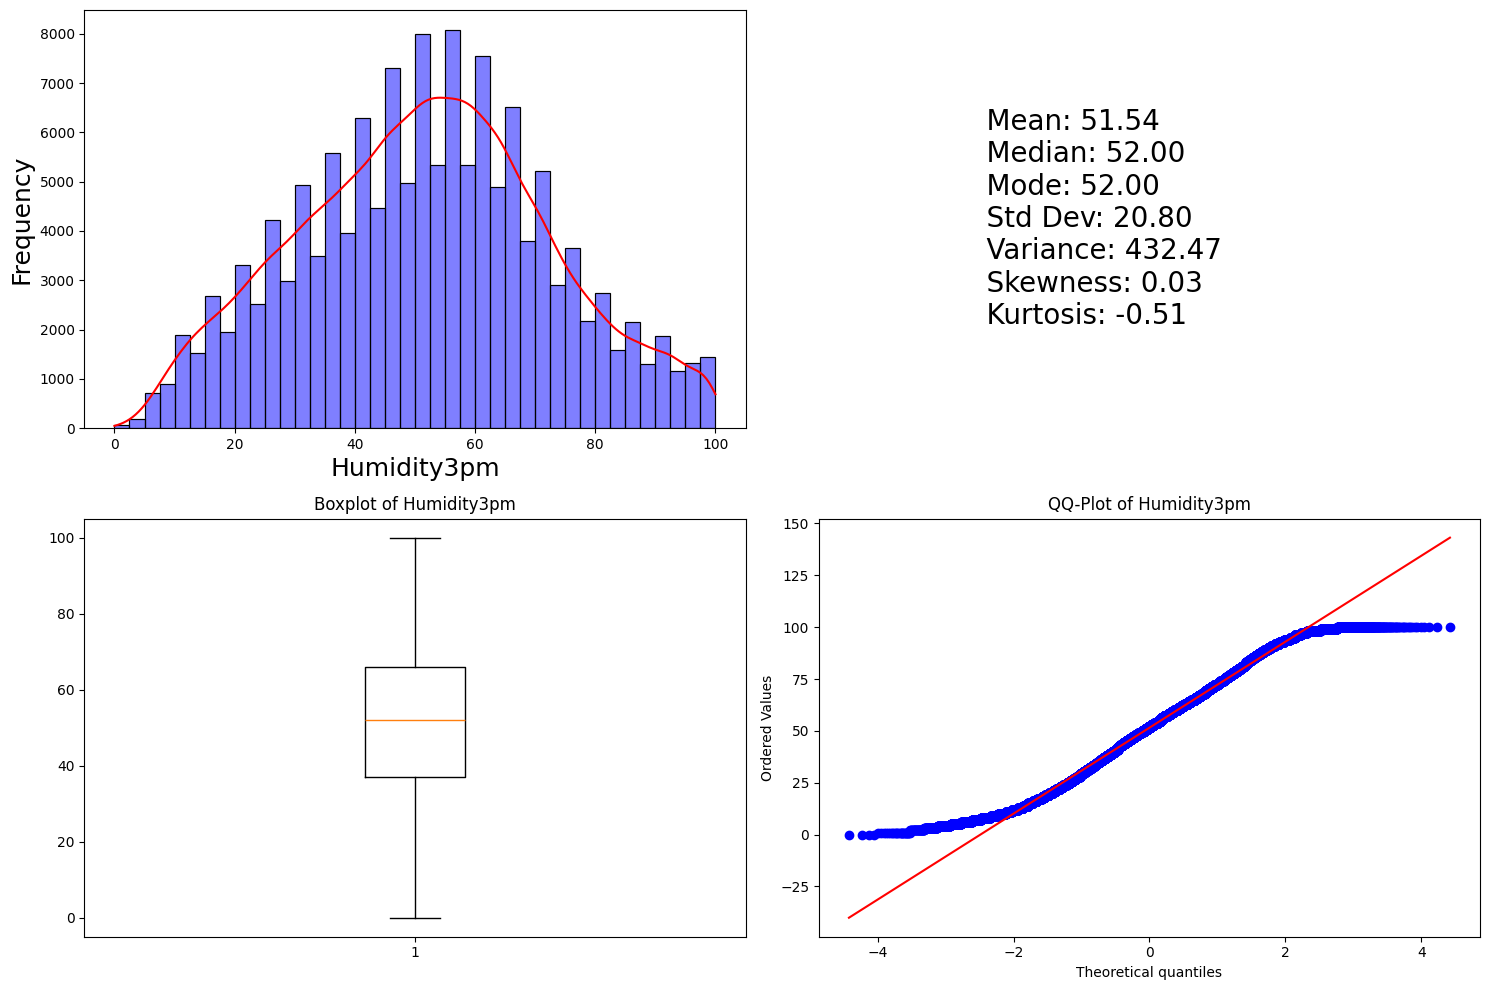

Column: Pressure9am


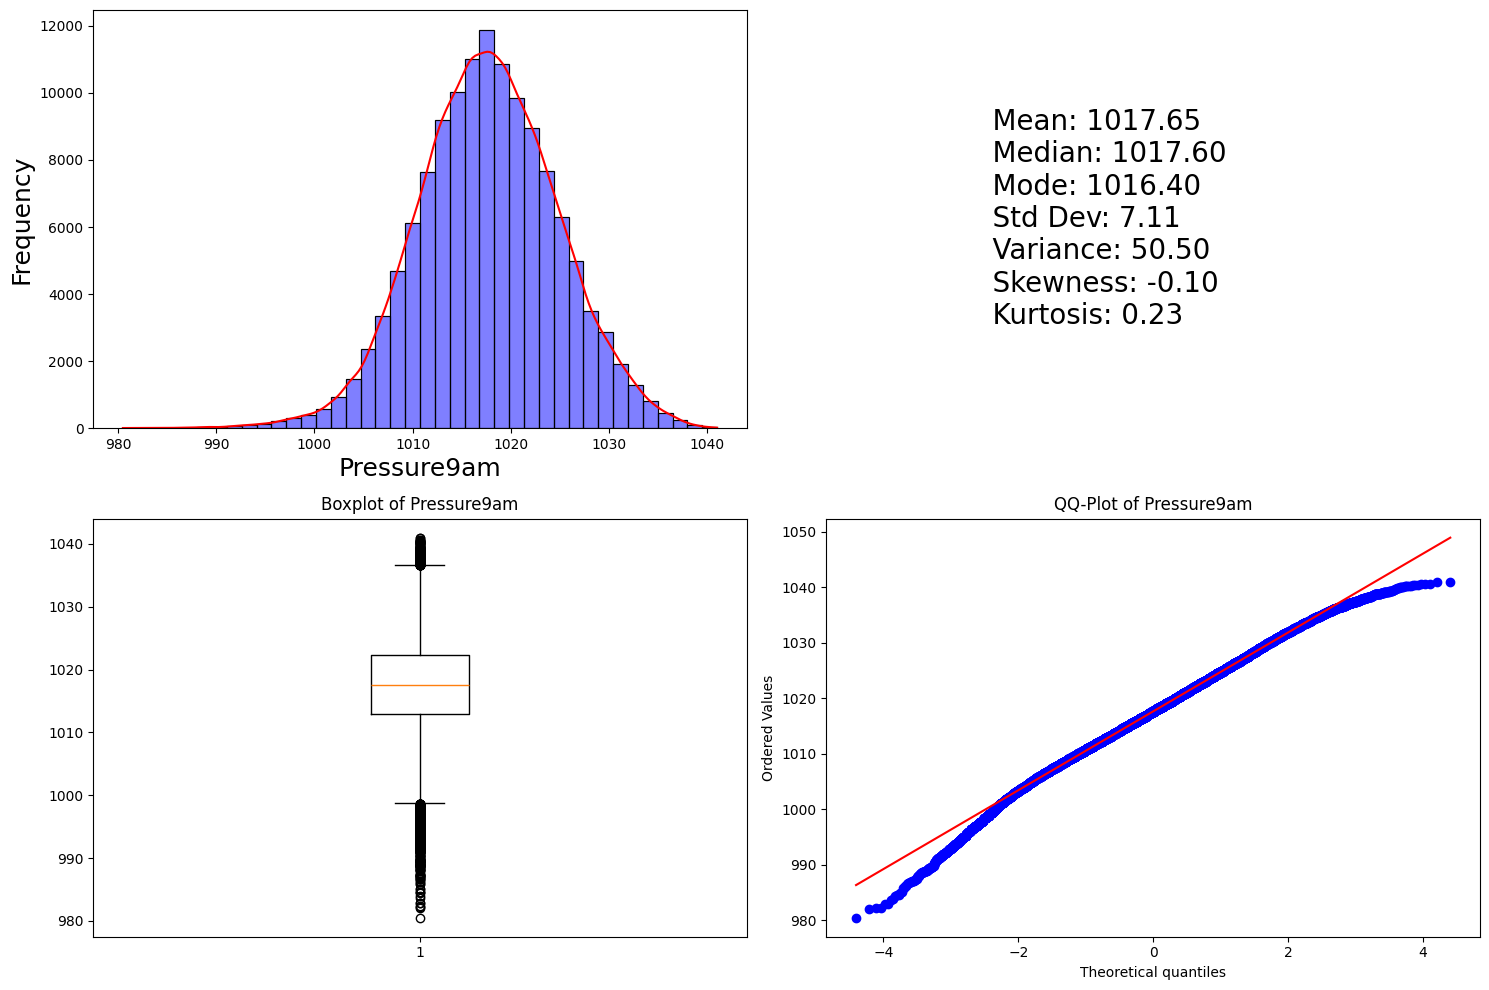

Column: Pressure3pm


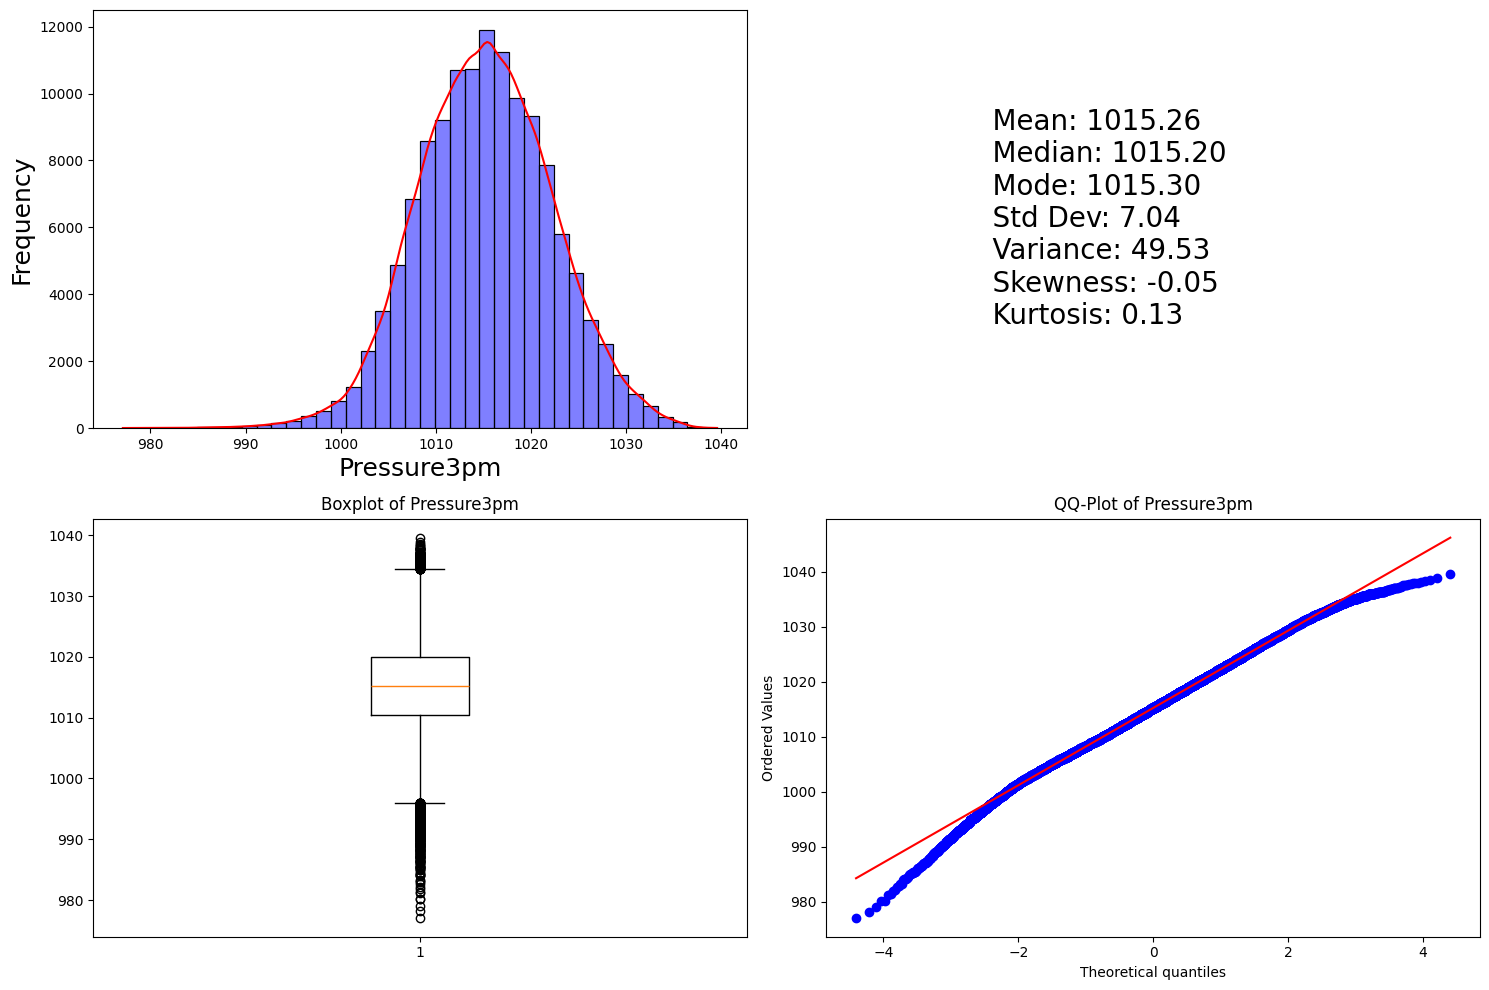

Column: Cloud9am


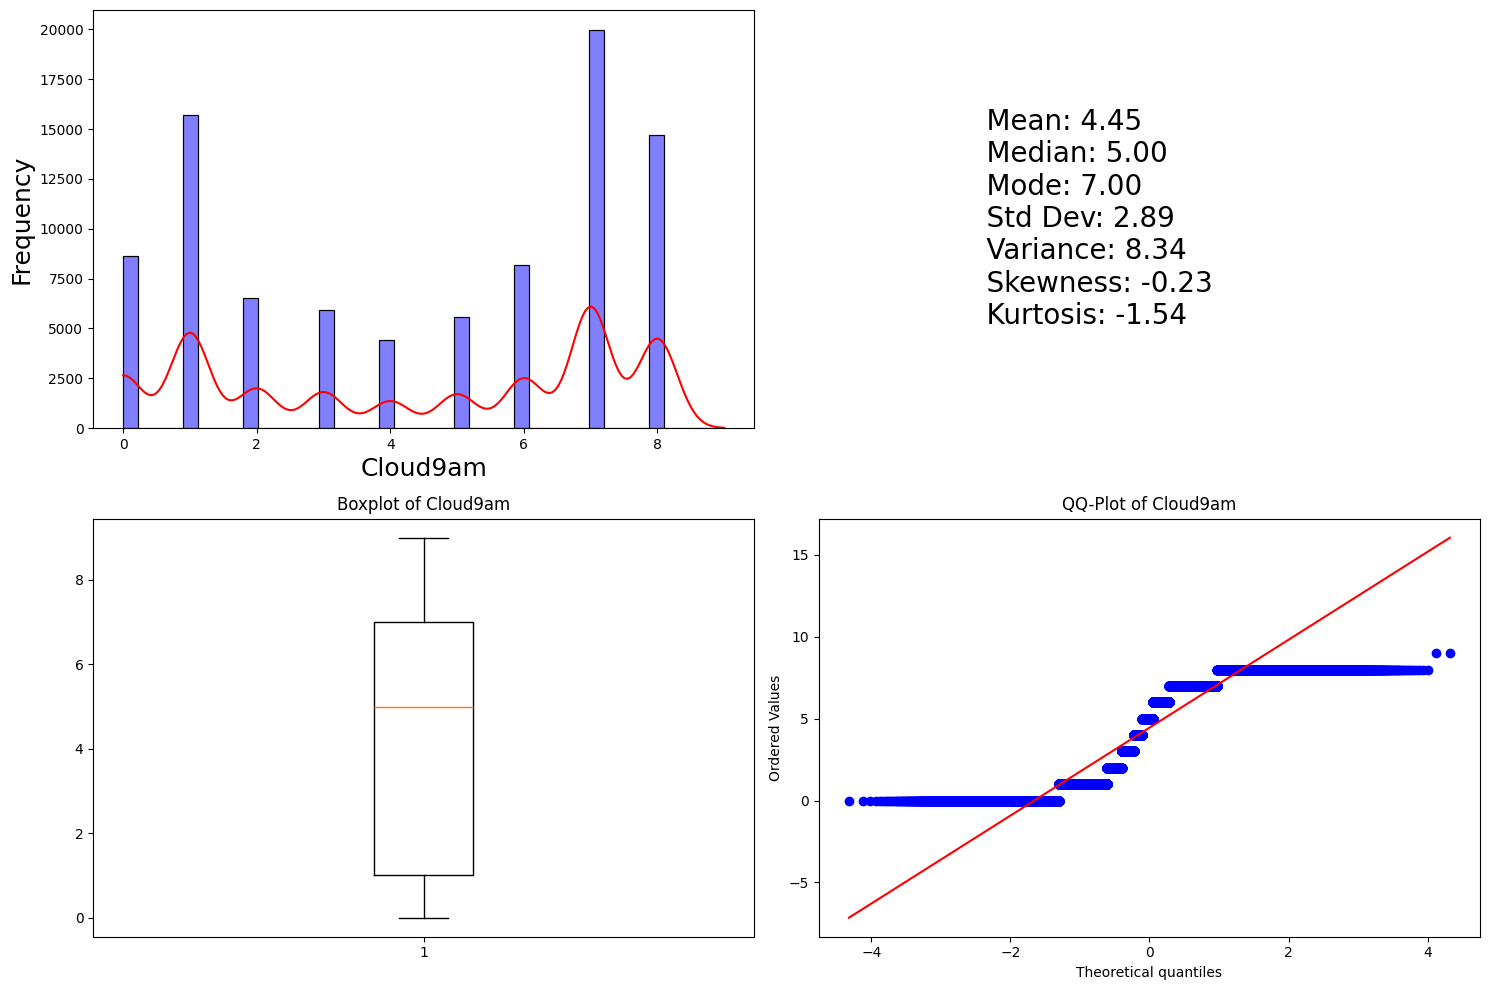

Column: Cloud3pm


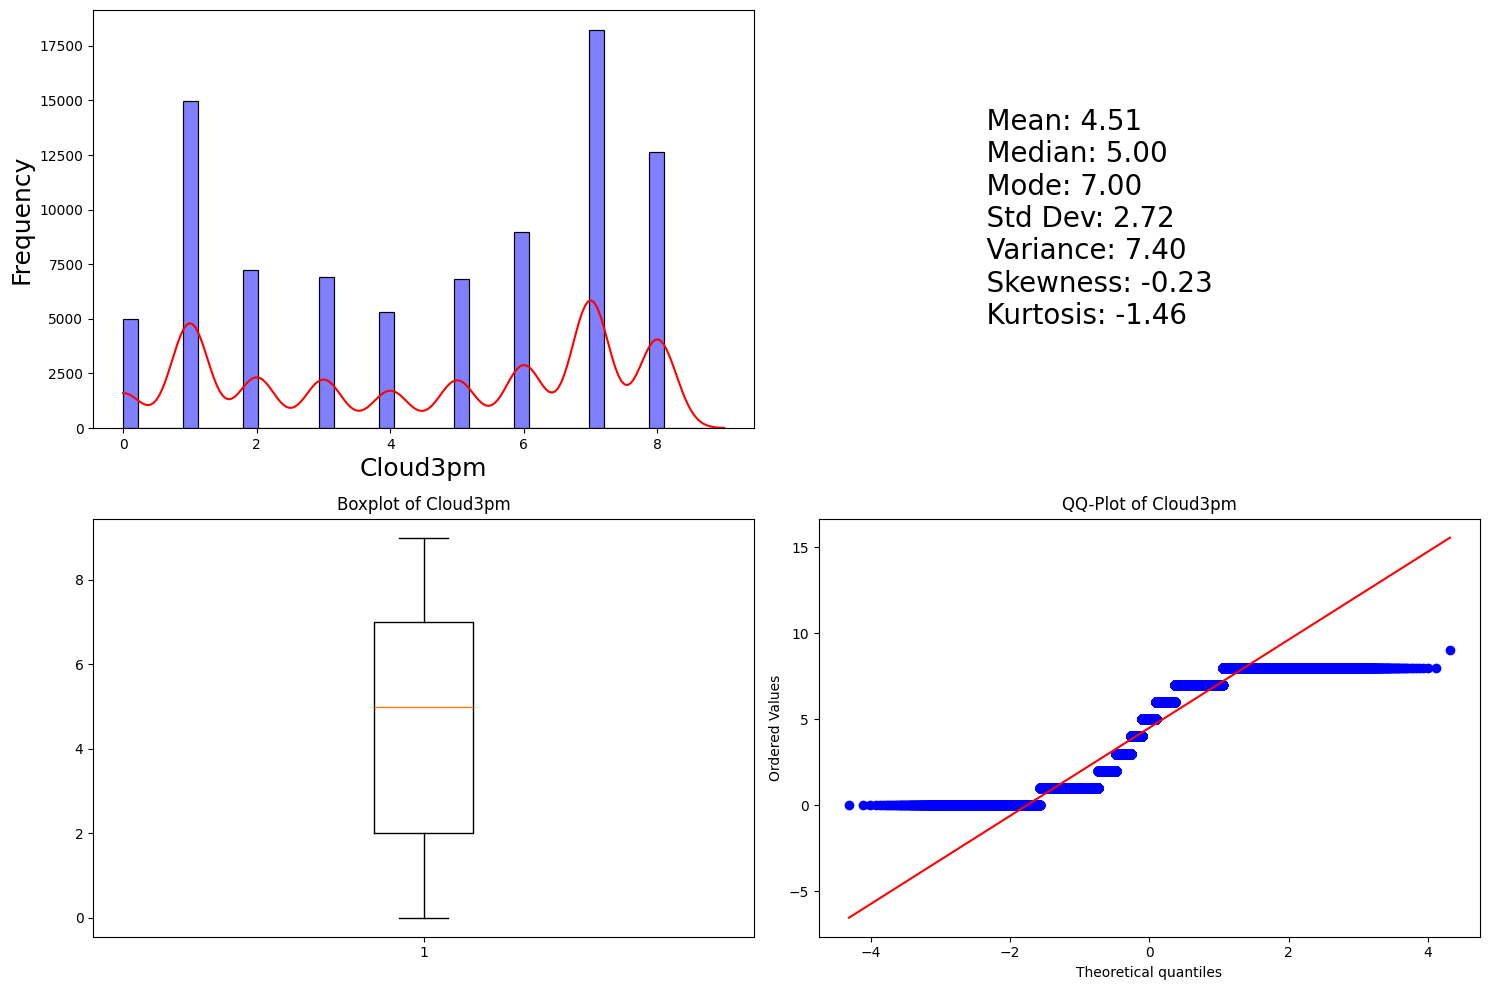

Column: Temp9am


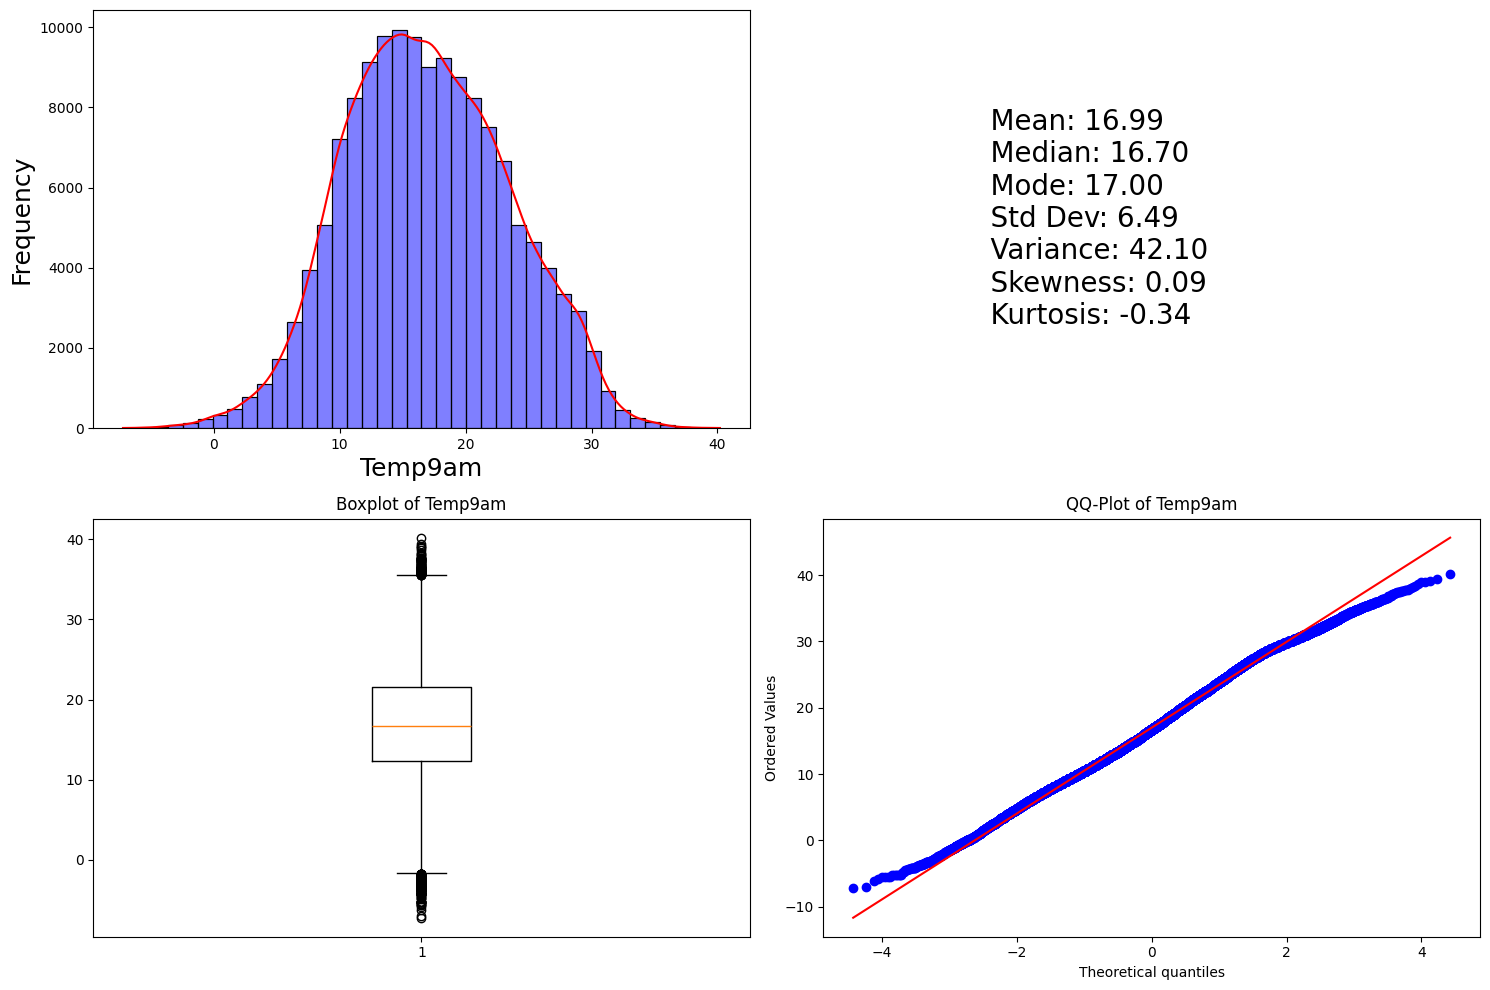

Column: Temp3pm


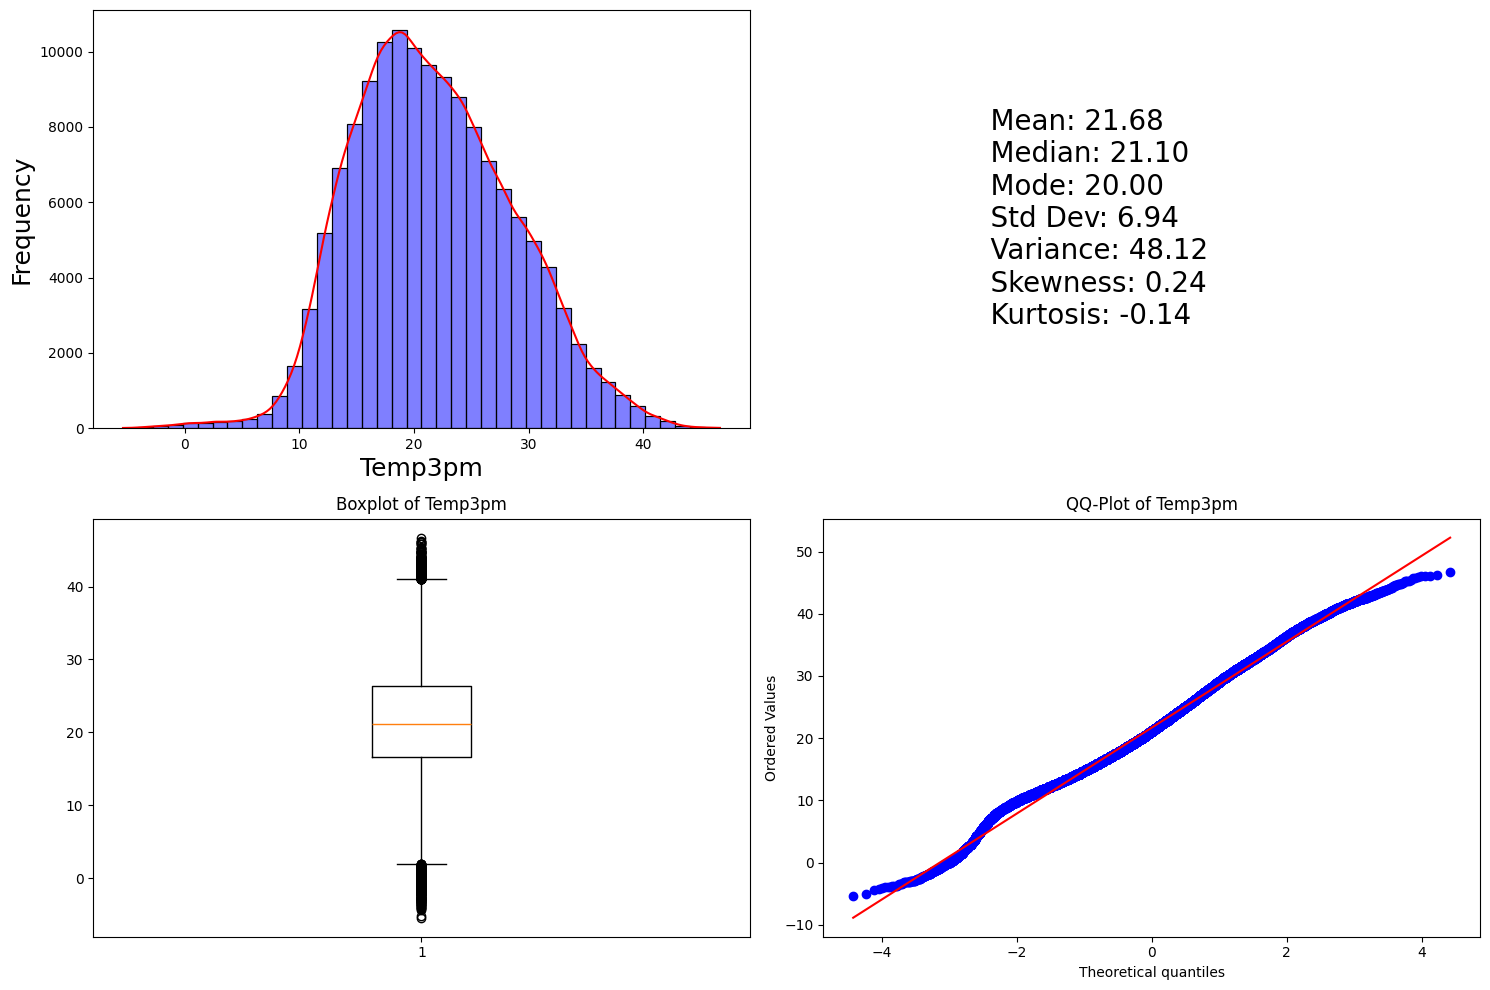

In [14]:
plot_histogram_and_statistics(data, data[numerical_columns(data)].columns, PLOT)

**Observaciones:**

**MinTemp y MaxTemp:** Ambas columnas tienen una media y mediana muy cercanas, lo que sugiere una distribución casi simétrica. La curtosis negativa indica que la distribución es platikúrtica.

**Rainfall:** La media es mucho mayor que la mediana, lo que indica una distribución sesgada a la derecha. La alta curtosis y oblicuidad sugieren la presencia de valores atípicos extremos. Su curtosis mayor que 3 indica que la distribución es leptokúrtica.

**Evaporation:** Similar a Rainfall, tiene una distribución sesgada a la derecha con valores atípicos extremos. Su curtosis mayor que 3 indica que la distribución es leptokúrtica.

**Sunshine:** La distribución muestra una ligera asimetría hacia la izquierda y exhibe características platikúrticas, indicando una menor frecuencia de valores extremos en comparación con una distribución normal. Un detalle notable en la gráfica es la abundancia de valores cero (0). Esta acumulación sugiere la posible presencia de errores o datos faltantes que han sido codificados como cero, lo cual requerirá una atención y tratamiento adecuados en etapas posteriores del análisis.

**WindGustSpeed, WindSpeed9am, WindSpeed3pm:** Estas columnas tienen una distribución ligeramente sesgada a la derecha, lo que indica que hay más días con velocidades de viento más bajas. Las tres distribuciones son mesokúrticas. 

**Humidity9am, Humidity3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad negativa para Humidity9am y positiva para Humidity3pm. La distribuciones son platikúrticas.

**Pressure9am, Pressure3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad negativa. Ambas distribuciones son mesokúrticas. 

**Cloud9am, Cloud3pm:** Ambas columnas tienen una distribución ligeramente sesgada a la izquierda y son platikúrticas.

**Temp9am, Temp3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad positiva. Ambas distribuciones son platikúrticas.

En general, las columnas **Rainfall, Evaporation y Sunshine** parecen tener los valores más atípicos, lo que podría ser un área de interés para una investigación más profunda. Además, la mayoría de las columnas parecen tener una distribución aproximadamente simétrica, lo que es una buena señal para muchos modelos estadísticos.

In [15]:
data[numerical_columns(data).values].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Basándonos en el resumen estadístico, las columnas que podrían contener valores atípicos son aquellas donde la diferencia entre el valor máximo y el percentil 75, o el valor mínimo y el percentil 25, es significativamente grande.

- Rainfall: El valor máximo es 371, mientras que el percentil 75 es 0.8.
- Evaporation: El valor máximo es 145, mientras que el percentil 75 es 7.4.
- WindGustSpeed: El valor máximo es 135, mientras que el percentil 75 es 48.
- WindSpeed9am: El valor máximo es 130, mientras que el percentil 75 es 19.

#### **2.5.2.** Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc. 

Análisis de variables que puedan tener alta cardinalidad.

In [16]:
max_length = max(len(var) for var in data[categorical_columns(data).values])

for var in data[categorical_columns(data).values]:    
    print(f'{var.ljust(max_length)} \t{len(data[var].unique())} labels.')

Date         	3436 labels.
Location     	49 labels.
WindGustDir  	17 labels.
WindDir9am   	17 labels.
WindDir3pm   	17 labels.
RainToday    	3 labels.
RainTomorrow 	3 labels.


#### **2.5.2.1.** Date:  
Esta variable tiene una cardinalidad muy alta con 3436 etiquetas únicas. Si se utiliza como característica en un modelo de aprendizaje automático, podría ser más útil extraer componentes como el año, el mes y el día, en lugar de usar la fecha completa.

#### **2.5.2.2.** Location:
Esta variable tiene una cardinalidad moderada con 49 etiquetas únicas. Esta variable será usada como variable de agrupación para analizar y estimar los datos faltantes.

#### **2.5.2.3.** WindGustDir, WindDir9am, WindDir3pm:
Estas variables tienen todas 17 etiquetas únicas.

#### **2.5.2.4.** RainToday, RainTomorrow:
Estas variables son de tipo boolean.

### **2.6.** Variables de salida (en caso de aplicar):

#### **2.6.1.** ¿Están balanceadas las clases?

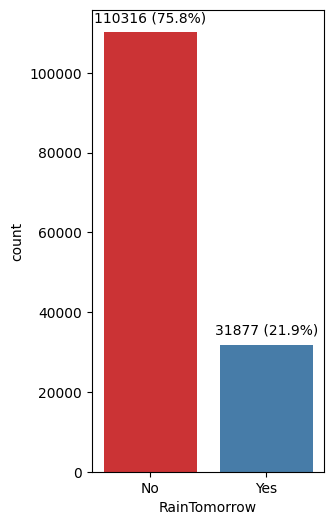

In [17]:
f, ax = plt.subplots(figsize=(3, 6))
ax = sns.countplot(x="RainTomorrow", hue="RainTomorrow", data=data, palette="Set1", legend=False)

total = len(data)
for p in ax.patches:
    count = format(p.get_height(), '.0f')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

El desbalanceo no es lo sufiencienteme grande para considerarse significativo.

#### **2.6.2.** ¿Qué técnicas consideraría para codificar la variable de salida (en caso de aplicar)? Justifique.

La variable de salida 'RainTomorrow' es una variable categórica binaria, lo que significa que tiene dos categorías: 'Yes' y 'No'. En este caso, se codificará la variable de salida en un número entero usando codificación binaria o de etiquetas (Label Encoding).

Esta elección está justificada ya que los algoritmos de aprendizaje automático suelen requerir que la variable de salida sea un solo vector de números enteros para la clasificación binaria.

In [18]:
from sklearn.preprocessing import LabelEncoder

def encode_variables(data, columns):
    le = LabelEncoder()

    for column in columns:
        # Fit the encoder on the non-null data
        non_null_data = data[column].dropna()
        le.fit(non_null_data)

        # Transform non-null data
        data.loc[data[column].notnull(), column] = le.transform(data.loc[data[column].notnull(), column])

    return data

def encode_and_convert_to_num(data, columns):
    data = encode_variables(data, columns)
    for column in columns:
        data[column] = data[column].astype('float64')
    return data

In [19]:
columns = ['RainToday', 'RainTomorrow']
data = encode_and_convert_to_num(data, columns)

# **3.** Limpieza y preparación de datos / ingeniería de features.

### **3.1.** Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

In [20]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False)/len(df)*100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent (%)'])

In [21]:
missing_percentage(data)

,Total,Percent (%)
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


### **3.2.** ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.

Los datos faltantes pueden surgir por diversas razones, incluyendo errores en la recopilación o falta de disponibilidad de información. 

**Supuestos:** En este caso, variables como 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am' tienen más del 30% de datos faltantes, lo que podría indicar que no se recogieron en todas las ubicaciones o momentos. Para variables con menos del 5% de datos faltantes, como 'Humidity9am', 'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp', se podría asumir que los datos faltantes son aleatorios.

Matriz de datos faltantes:

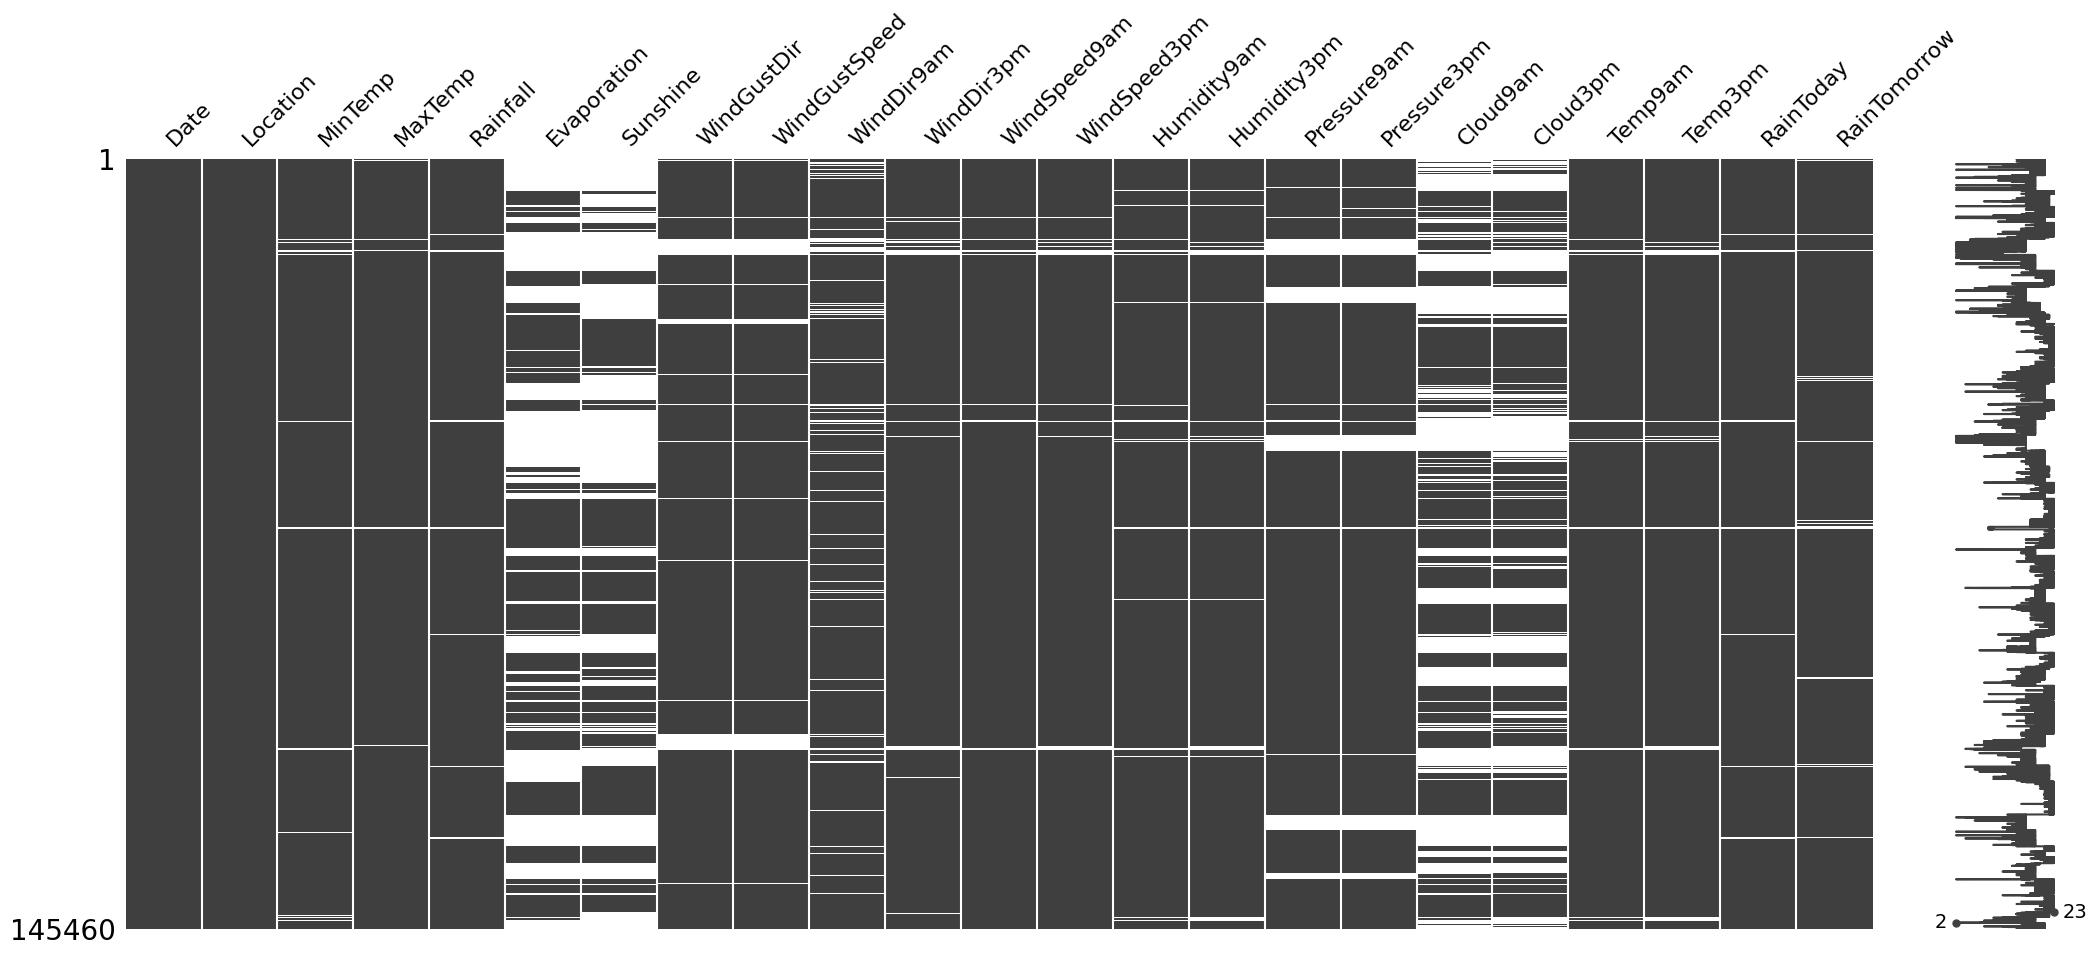

In [22]:
import missingno as msno

if PLOT:
    msno.matrix(data)

#### **3.2.1** Limpieza de datos que no proporcionan información.

In [23]:
def process_nan_records(data, exclude_columns):
    # Select all columns except those specified in 'exclude_columns'
    columns = [col for col in data.columns if col not in exclude_columns]

    # Find the records where all selected columns are NaN
    nan_indices = data[data[columns].isnull().all(axis=1)].index
    
    # Create a new DataFrame that excludes the NaN records
    data_without_nan = data.drop(nan_indices)

    # Calculate the number of records removed
    num_removed = len(nan_indices)

    return data_without_nan, num_removed

In [24]:
columns = ['Location', 'Date']
data, removed = process_nan_records(data, columns)
print(f'Records removed: {removed}')

Records removed: 182


#### **3.2.2** Mapa de correlacion

In [25]:
def plot_heatmap(correlation_matrix, title='Correlation Heatmap', fig_size=(16, 12), cmap='coolwarm', linecolor='white', linewidths=0.5):
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(correlation_matrix, ax=ax, square=True, annot=True, fmt='.2f', linecolor=linecolor, linewidths=linewidths, cmap=cmap)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
    fig.patch.set_facecolor('silver')
    plt.show()

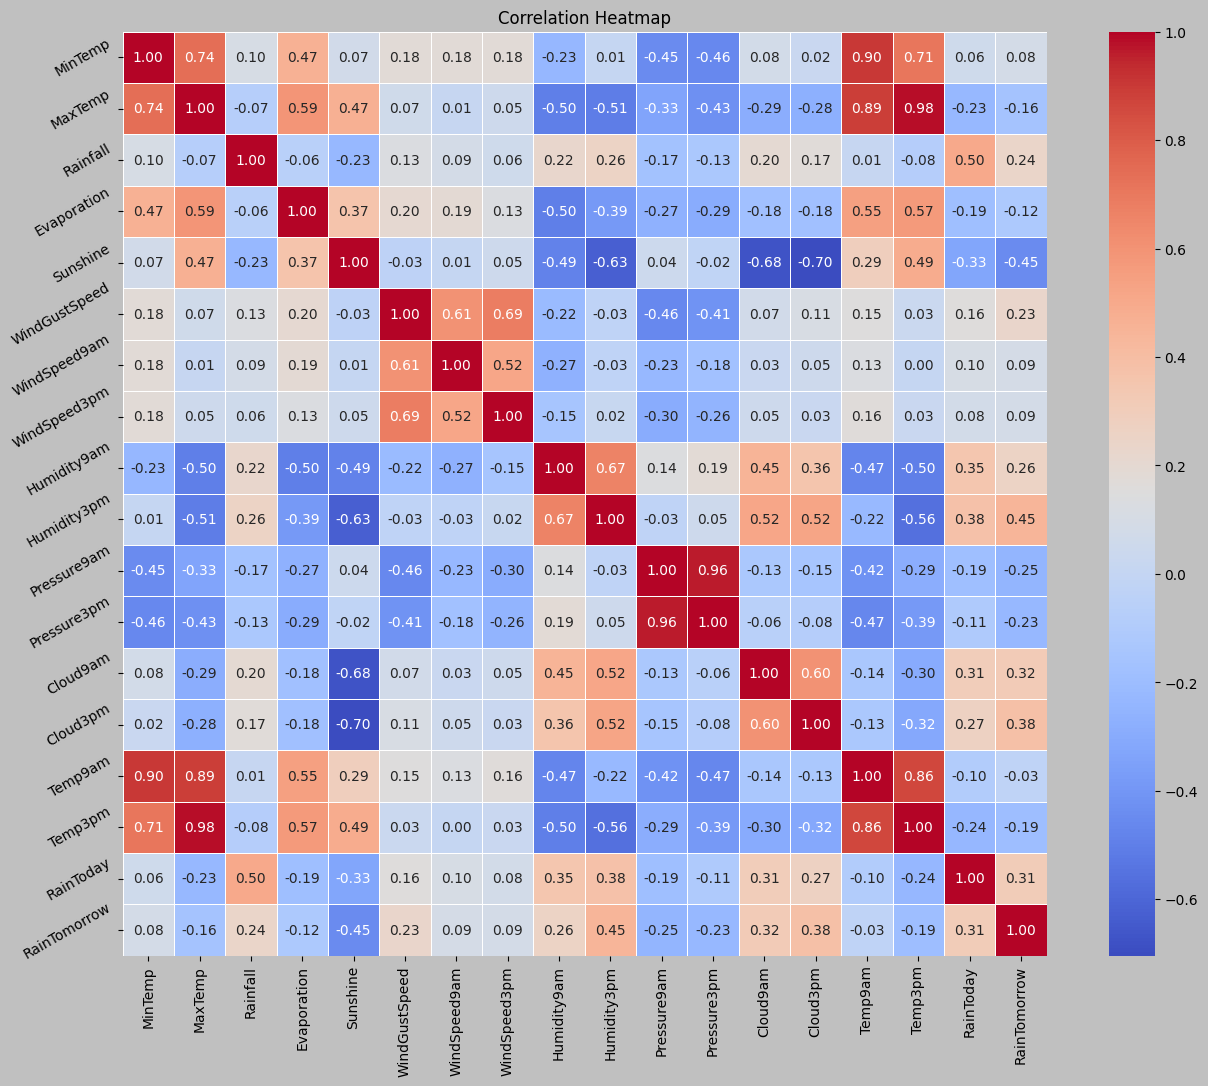

In [26]:
correlation = data[numerical_columns(data).values].corr()
plot_heatmap(correlation)

**Observaciones:**  
Las variables con la correlación más fuerte positiva son 'MaxTemp' y 'Temp3pm' con una correlación de 0.98. Esto indica que a medida que la temperatura máxima del día aumenta, la temperatura a las 3pm también tiende a aumentar. Las variables 'MinTemp' y 'Temp9am' también tienen una fuerte correlación positiva de 0.90, lo que indica que las temperaturas mínimas y las temperaturas a las 9am están estrechamente relacionadas.

La presión a las 9am ('Pressure9am') y a las 3pm ('Pressure3pm') tienen una fuerte correlación positiva de 0.96, lo que indica que la presión tiende a ser similar en estos dos momentos del día.

Las variables con la correlación más fuerte negativa son 'Sunshine' y 'Cloud3pm' con una correlación de -0.70. Esto indica que a medida que la cantidad de sol durante el día aumenta, la cantidad de nubes a las 3pm tiende a disminuir.

La humedad a las 9am ('Humidity9am') y a las 3pm ('Humidity3pm') tienen una correlación positiva de 0.67, lo que indica que la humedad tiende a ser similar en estos dos momentos del día.

#### Datos inconsistentes.

In [27]:
def get_inconsistent_data(data, conditions):
    return pd.concat([data[condition] for condition in conditions])

#### **3.2.3** MinTemp, MaxTemp, Temp9am, Temp3pm: Inconsistencias en las temperaturas (ej: Temp3pm mayor que MaxTemp).

In [28]:
def get_temp_conditions(data):
    temp_conditions = [
        data['MinTemp'] > data['Temp9am'],
        data['MinTemp'] > data['Temp3pm'],
        data['MaxTemp'] < data['Temp9am'],
        data['MaxTemp'] < data['Temp3pm']
    ]
    return temp_conditions

In [29]:
columns_to_display = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

temp_conditions = get_temp_conditions(data)
get_inconsistent_data(data, temp_conditions)[columns_to_display]

,MinTemp,MaxTemp,Temp9am,Temp3pm
34277,22.8,24.6,22.7,23.4
46697,19.5,21.0,17.3,20.0
109333,19.3,22.0,19.2,20.9
110502,12.5,15.4,12.0,13.0
128396,15.2,17.7,15.1,16.7
...,...,...,...,...
142335,NaN,30.4,NaN,30.5
142719,20.9,34.9,25.5,35.0
142944,25.3,36.9,30.2,37.0
143072,23.8,32.9,27.2,33.0


In [30]:
def correct_temperatures(data):
    data['Temp9am'] = data['Temp9am'].where(data['Temp9am'] >= data['MinTemp'], data['MinTemp'])
    data['Temp3pm'] = data['Temp3pm'].where(data['Temp3pm'] >= data['MinTemp'], data['MinTemp'])
    data['Temp9am'] = data['Temp9am'].where(data['Temp9am'] <= data['MaxTemp'], data['MaxTemp'])
    data['Temp3pm'] = data['Temp3pm'].where(data['Temp3pm'] <= data['MaxTemp'], data['MaxTemp'])
    
    return data

In [31]:
correct_temperatures(data)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


#### **3.2.4** Sunshine: Posibles errores de Imputación (gran abundancia de valores cero).

In [32]:
data['Sunshine'].value_counts()

Sunshine
0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: count, Length: 145, dtype: int64

**Explorar tendencia:** Dado que existe una correlación de -0.70 entre 'Sunshine' y 'Cloud3pm', podría ser útil analizar si hay una tendencia de que 'Sunshine' valga cero en relación con 'Cloud3pm'.

In [33]:
def check_sunshine_cloud_relation(data):
    # Check if 'Sunshine' tends to be 0 when 'Cloud3pm' is high
    high_cloud3pm = data['Cloud3pm'] > data['Cloud3pm'].median()
    sunshine_zero = data['Sunshine'] == 0

    return round((high_cloud3pm & sunshine_zero).mean(), 4)

In [34]:
check_sunshine_cloud_relation(data)

0.0141

Dado que la proporción de días en los que 'Cloud3pm' es mayor que su mediana y 'Sunshine' es = 0 es 1.4%, no se evidencia una tendencia clara de que 'Sunshine' sea 0 cuando 'Cloud3pm' es alto.

Por tal motivo, vamos a considerar estos valores ('Sunshine' = 0) como errores de medición o de registro y serán estimados en la etapa de imputación de datos. 

In [35]:
data['Sunshine'] = data['Sunshine'].replace(0, np.nan)

**Observacion:**  
Podríamos pensar en eliminar esta columna, ya que presenta un significativo numero de valores bajos para 'Sunshine'. Por conocimiento externo, Melbourne es la ciudad con posible menor cantidad de 'Sunshine' (estimado en 120 en un mes, 4 por día en promedio). Si consideramos los valores por debajo de esta medida como errores de medición, esta columna nos aportaria significativa muy poca información.

#### **3.2.5.** 'Rainfall', 'Evaporation': Exploracion y analisis de valores con curtosis > 3.

In [36]:
def find_max_correlation(correlation, column):
    """Find the variable that has the strongest correlation with the given column."""
    return correlation[column].sort_values(ascending=False).index[1]

In [37]:
def get_top_records_and_group(data, sort_col, select_cols, n=10):
    # Get the 'n' records with the largest value in 'sort_col'
    top_records = data.nlargest(n, sort_col)[select_cols]

    # Get the unique locations of the top records
    unique_locations = top_records['Location'].unique()

    # For each location, get the 'n' top records and add them to a list
    top_records_per_location = []
    for location in unique_locations:
        top_n_for_location = data[data['Location'] == location].nlargest(n, sort_col)[select_cols]
        top_records_per_location.append(top_n_for_location)

    # Concatenate all the DataFrames in the list into a single DataFrame
    result = pd.concat(top_records_per_location)

    return result

In [38]:
columns_to_check = ['Rainfall', 'Evaporation']

for column in columns_to_check:
    max_corr = find_max_correlation(correlation, column)
    print(f"The strongest correlation with '{column}' is with '{max_corr}'.")

The strongest correlation with 'Rainfall' is with 'RainToday'.
The strongest correlation with 'Evaporation' is with 'MaxTemp'.


In [39]:
# Get the top 10 records for each location
size = 10

'Rainfall':

In [40]:
column = 'Rainfall'
columns_to_display = ['Location', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']

get_top_records_and_group(data, column, columns_to_display, size)

,Location,Rainfall,Humidity3pm,RainToday,RainTomorrow
9368,CoffsHarbour,371.0,81.0,1.0,1.0
11681,CoffsHarbour,219.6,83.0,1.0,0.0
10485,CoffsHarbour,208.5,96.0,1.0,1.0
9105,CoffsHarbour,189.0,64.0,1.0,1.0
10486,CoffsHarbour,172.2,77.0,1.0,0.0
10445,CoffsHarbour,159.8,72.0,1.0,0.0
11232,CoffsHarbour,157.8,60.0,1.0,0.0
10154,CoffsHarbour,153.2,83.0,1.0,1.0
10574,CoffsHarbour,147.8,50.0,1.0,0.0
11965,CoffsHarbour,142.8,79.0,1.0,0.0


En este caso, estamos viendo datos de lluvia, que pueden ser altamente variables y pueden tener eventos extremos (como tormentas fuertes o huracanes) que producen valores de lluvia muy altos. Además, la correlación fuerte entre 'Rainfall' y 'RainToday' sugiere que estos valores altos no son simplemente errores aleatorios, sino que están asociados con días de lluvia.

Además, si observamos los datos agrupados por ciudad, vemos que las ciudades con los valores más altos de 'Rainfall' también tienden a tener valores altos. Esto sugiere que estos valores altos pueden ser característicos de estas ubicaciones.

Por lo tanto, en base a la información proporcionada, parece más probable que estos valores atípicos sean propios de la naturaleza de los datos y no errores.

'Evaporation':

In [41]:
column = 'Evaporation'
columns_to_display = ['Location', 'Rainfall', 'Evaporation', 'MaxTemp', 'RainToday']

get_top_records_and_group(data, column, columns_to_display, size)

,Location,Rainfall,Evaporation,MaxTemp,RainToday
42358,Williamtown,58.2,145.0,23.9,1.0
41294,Williamtown,0.0,64.4,28.5,0.0
42316,Williamtown,0.0,59.2,33.0,0.0
42288,Williamtown,0.0,55.4,33.4,0.0
42370,Williamtown,0.2,47.0,32.2,0.0
41181,Williamtown,0.0,43.6,22.3,0.0
41203,Williamtown,0.0,40.0,35.4,0.0
41287,Williamtown,0.0,38.8,26.0,0.0
40856,Williamtown,0.0,38.0,25.0,0.0
40913,Williamtown,0.0,38.0,32.0,0.0


Nuevamente considero que los valores atipicos puedan corresponderse con eventos propios de su  naturaleza.

### **3.3.** Imputación de valores faltantes.

**3.3.1.** Extraccion de valores 'Year', 'Month', and 'Day' de la variable 'Date' en nuevas columnas.

In [42]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop('Date', axis=1, inplace = True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145278 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145278 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       73266 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null   fl

Para una mayor presición en la imputación de los valores faltantes, he agrupado la información por la variable 'Location' para que la estimación sea acotada solo al alcance de los valores de cada 'Location'.

In [44]:
data = data.groupby('Location')

**Imputación MICE:**

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_mice(df, columns, max_iter=10, random_state=0):
    mice_imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)    
    df[columns] = mice_imputer.fit_transform(df[columns])
    return df

**Imputación simple por estrategia:**

In [46]:
from sklearn.impute import SimpleImputer

def impute_values(df, columns, strategy):
    imputer = SimpleImputer(strategy=strategy)
    df[columns] = imputer.fit_transform(df[columns])
    return df

**'MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm':** Imputación de variables con menor cantidad de datos faltantes y altamente correlacionadas.

In [47]:
columns = ['MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm']

# Apply MICE imputation to each group of 'Location' separately
data = data.apply(lambda group: impute_mice(group, columns, max_iter=100), include_groups=False)

**'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Humidity9am':** Imputación de variables numericas con pocos datos faltantes.

In [48]:
columns = ['Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Humidity9am']
data = impute_mice(data, columns, max_iter=50)

**'WindDir9am', 'WindGustDir', 'WindDir3pm':** Imputación de variables categóricas.

In [49]:
for location, group in data.groupby('Location'):
    print(f"Location: {location} | {len(group)} records.")
    print_categorical_columns(group)
    print()

Location: Adelaide | 3193 records.
Categorical columns:
WindDir9am      274 null values.    	 16 unique values: 	 ['SW', 'SSW', 'NNE', 'WNW', 'N', 'WSW', 'ENE', 'NE', 'W', 'S', nan, 'ESE', 'NNW', 'SSE', 'NW', 'E', 'SE']
WindGustDir     26 null values.    	 16 unique values: 	 ['NW', 'SW', 'W', 'NNE', 'N', 'NNW', 'WSW', 'WNW', 'SSE', 'ENE', 'SSW', nan, 'ESE', 'SE', 'NE', 'E', 'S']
WindDir3pm      16 null values.    	 16 unique values: 	 ['W', 'SW', 'NE', 'NNW', 'WSW', 'NW', 'N', 'ENE', 'S', 'SSW', 'NNE', nan, 'WNW', 'E', 'SSE', 'ESE', 'SE']

Location: Albany | 3040 records.
Categorical columns:
WindGustDir     3040 null values.    	 0 unique values: 	 [nan]
WindDir3pm      783 null values.    	 16 unique values: 	 ['SW', 'ESE', 'WSW', 'SSE', 'SE', 'N', 'S', 'W', nan, 'SSW', 'E', 'ENE', 'NNW', 'WNW', 'NW', 'NNE', 'NE']
WindDir9am      247 null values.    	 16 unique values: 	 ['NNW', 'NE', 'ENE', 'N', 'SW', 'ESE', 'W', 'S', 'WNW', 'NNE', 'SE', 'SSW', 'E', 'SSE', 'WSW', nan, 'NW']

Locati

Se observa que la variable 'WindGustDir' no tiene ningun valor registrado para su 'Location' respectiva en los siguientes casos:

**Location: Newcastle** = 2985 records.  
WindGustDir:     2985 null values.

**Location: Albany** = 3040 records.  
WindGustDir:     3040 null values.

Por tal motivo, se imputaran los valores para 'WindDir9am', 'WindDir3pm' y 'RainToday' por el valor mas frecuente. 

In [50]:
columns = ['WindDir9am', 'WindDir3pm', 'RainToday']
data = impute_values(data, columns, 'most_frequent')

data['RainToday'] = data['RainToday'].astype('float64')

Y se imputaran los valores de 'WindGustDir' creando una nueva categoria 'MISSING'.

In [51]:
data.loc[:, 'WindGustDir'] = data.loc[:, 'WindGustDir'].fillna('MISSING')

**'Evaporation', 'WindSpeed9am', 'WindSpeed3pm':** Imputación de variables con valores atipicos.

In [52]:
columns = ['Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
df = impute_values(data, columns, 'median')

**'Sunshine', 'Cloud3pm', 'Cloud9am':** Imputación de variables numericas con alta cantidad de datos faltantes.

In [53]:
columns = ['Sunshine', 'Cloud3pm', 'Cloud9am']
data = impute_mice(data, columns, max_iter=50)

**'Rainfall':** Para la variable 'Rainfall', imputo los valores faltantes con 0, asumiendo que si el valor de la lluvia no se registró, entonces probablemente no llovió ese día. 

In [54]:
data['Rainfall'] = data['Rainfall'].fillna(0)

In [55]:
missing_percentage(data)

,Total,Percent (%)
RainTomorrow,3085,2.12


Solamente la variable target 'RainTomorrow' posee valores faltantes. Se eliminan estos registros ya que no tiene sentido imputar un valor de la variable target, adicionalmente el porcentaje de datos faltantes no es representativo.

**'RainTomorrow':** Se eliminan los registros con 'RainTomorrow' nulo.

In [56]:
data = data.dropna(subset=['RainTomorrow'])
data = data.reset_index()

In [57]:
def drop_column_if_exists(df, column):
    if column in df.columns:
        df = df.drop(columns=[column])
    return df

data = drop_column_if_exists(data, 'level_1')

In [58]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

El 100% de los datos ha sido imputados satisfactoriamente.

### **3.3.** En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable.

In [59]:
data['RainToday'].value_counts()

RainToday
0.0    110738
1.0     31455
Name: count, dtype: int64

**One-Hot Encoding.**

La codificación One-Hot genera columnas binarias para cada categoría de una variable nominal, facilitando su análisis.

In [60]:
def get_dummies(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column, drop_first=True, dummy_na=False).astype(int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    return df

In [61]:
columns = ['Location', 'WindDir9am', 'WindGustDir', 'WindDir3pm']
data = get_dummies(data, columns)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.8,15.7,5.0,1.6,2.600000,48.0,13.0,15.0,92.0,67.0,...,0,0,0,0,0,0,0,1,0,0
1,12.7,15.8,0.8,1.4,7.800000,35.0,13.0,15.0,75.0,52.0,...,0,0,0,0,0,0,1,0,0,0
2,6.2,15.1,0.0,1.8,2.100000,20.0,2.0,11.0,81.0,56.0,...,0,0,0,0,0,0,1,0,0,0
3,5.3,15.9,0.0,1.4,8.000000,30.0,6.0,13.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
4,11.3,15.7,0.0,4.8,1.500000,52.0,15.0,22.0,62.0,62.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,5.6,19.7,0.0,2.2,11.645494,20.0,9.0,7.0,61.0,28.0,...,0,0,0,0,0,0,0,0,0,0
142189,5.8,19.9,0.0,2.0,10.729785,22.0,11.0,9.0,52.0,22.0,...,0,0,0,0,0,0,0,0,0,0
142190,7.8,19.0,0.0,1.4,4.754900,31.0,13.0,17.0,48.0,37.0,...,1,0,0,0,0,0,0,0,0,0
142191,8.0,22.5,0.0,4.0,7.257183,33.0,13.0,15.0,57.0,31.0,...,0,1,0,0,0,0,0,0,0,0


#### **3.4.** ¿Qué puede decir acerca de las relaciones entre las variables de entrada?
Ver secciones 2.5.1 y 3.2.2.

#### **3.5.** Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?

Para evitar redundancia y disminuir la dimensionalidad, se eliminan las columnas 'Temp9am', 'Temp3pm', dado a que sus valores pueden ser representados por las columnas 'MinTemp' y 'Maxtemp'.

In [62]:
data = data.drop(['Temp9am', 'Temp3pm'], axis=1)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.8,15.7,5.0,1.6,2.600000,48.0,13.0,15.0,92.0,67.0,...,0,0,0,0,0,0,0,1,0,0
1,12.7,15.8,0.8,1.4,7.800000,35.0,13.0,15.0,75.0,52.0,...,0,0,0,0,0,0,1,0,0,0
2,6.2,15.1,0.0,1.8,2.100000,20.0,2.0,11.0,81.0,56.0,...,0,0,0,0,0,0,1,0,0,0
3,5.3,15.9,0.0,1.4,8.000000,30.0,6.0,13.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
4,11.3,15.7,0.0,4.8,1.500000,52.0,15.0,22.0,62.0,62.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,5.6,19.7,0.0,2.2,11.645494,20.0,9.0,7.0,61.0,28.0,...,0,0,0,0,0,0,0,0,0,0
142189,5.8,19.9,0.0,2.0,10.729785,22.0,11.0,9.0,52.0,22.0,...,0,0,0,0,0,0,0,0,0,0
142190,7.8,19.0,0.0,1.4,4.754900,31.0,13.0,17.0,48.0,37.0,...,1,0,0,0,0,0,0,0,0,0
142191,8.0,22.5,0.0,4.0,7.257183,33.0,13.0,15.0,57.0,31.0,...,0,1,0,0,0,0,0,0,0,0


Para identificar las variables de entrada de mayor importancia sobre la variable objetivo, vamos a utilizar un de aprendizaje automático (RandomForest).

In [63]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns='RainTomorrow')  
y = data['RainTomorrow']  

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

In [64]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

In [65]:
feature_importances.head(10)

,feature,importance
9,Humidity3pm,0.142992
4,Sunshine,0.061611
11,Pressure3pm,0.056435
10,Pressure9am,0.053262
5,WindGustSpeed,0.050175
8,Humidity9am,0.049380
2,Rainfall,0.049028
1,MaxTemp,0.043789
0,MinTemp,0.042660
13,Cloud3pm,0.037578


# **4.** Entrenamiento de modelos (opcional).


### **4.1.** Separación de datos.
Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados.

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenar un modelo de Random Forest:

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Accuracy: {accuracy}')

Random Forest Accuracy: 0.8584338408523506


Entrenar un modelo de Gradient Boosting.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

print(f'Gradient Boosting accuracy: {gb_accuracy}')

Gradient Boosting accuracy: 0.8541439572418158


#### **4.2.** Evaluación de resultados:


Curva ROC:

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

def calculate_roc_auc(clf, X_test, y_test):
    y_probs = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    return fpr, tpr, roc_auc

def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

RandomForest AUC-ROC: 0.8874
GradientBoosting AUC-ROC: 0.8748


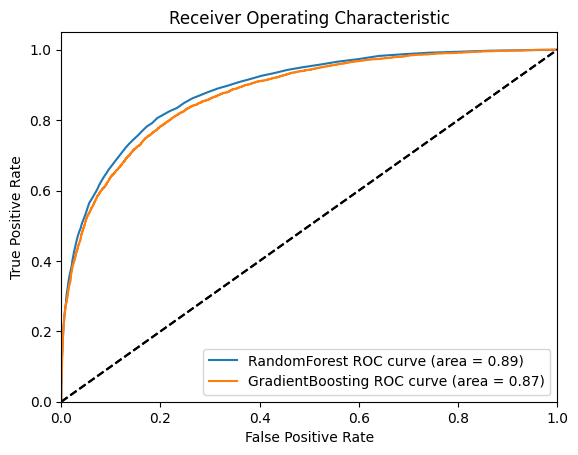

In [70]:
# RandomForest
fpr_rf, tpr_rf, roc_auc_rf = calculate_roc_auc(clf, X_test, y_test)
print(f'RandomForest AUC-ROC: {round(roc_auc_rf, 4)}')

# GradientBoosting
fpr_gb, tpr_gb, roc_auc_gb = calculate_roc_auc(gb_clf, X_test, y_test)
print(f'GradientBoosting AUC-ROC: {round(roc_auc_gb, 4)}')

plt.figure()
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'RandomForest')
plot_roc_curve(fpr_gb, tpr_gb, roc_auc_gb, 'GradientBoosting')
plt.show()

Tanto Gradient Boosting como Random Forest han arrojado respuestas similares en terminos de resultado y costo.

Ambos modelos son técnicas de ensamble que combinan múltiples modelos más débiles para crear un modelo más fuerte.

El Random Forest funciona creando un conjunto de árboles de decisión durante el entrenamiento y generando la predicción que es el modo de las predicciones de cada árbol. Por otro lado, Gradient Boosting funciona construyendo árboles de decisión en serie, donde cada árbol trata de corregir los errores cometidos por el árbol anterior.